### Importa las librerías

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

### array de NumPy vs. tensor de PyTorch.

In [5]:
n = np.linspace(0,1,5)
t = torch.linspace(0,1,5)

In [6]:
print("Array: ", n)
print("Tensor: ", t)

Array:  [0.   0.25 0.5  0.75 1.  ]
Tensor:  tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


#### Crea una secuencia de 48 números consecutivos y luego los reorganizan en una estructura tridimensional (tensor o array) de tamaño 3x4x4:

In [7]:
n = np.arange(48).reshape(3,4,4)
t = torch.arange(48).reshape(3,4,4)

In [8]:
from IPython.display import display, HTML

html_code = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%;">
        <h3>NumPy Array:</h3>
        <pre>{n}</pre>
    </div>
    <div style="width: 40%;">
        <h3>PyTorch Tensor:</h3>
        <pre>{t}</pre>
    </div>
</div>
"""

display(HTML(html_code))

### Broadcasting Rules

In [9]:
# Tensor 'a' de dimensiones (6, 5) lleno de unos
a = torch.ones((6,5))
# Tensor 'b' que contiene los números del 0 al 4, y da la forma de (1, 5)
b = torch.arange(5).reshape((1,5))

In [10]:
from IPython.display import display, HTML

html_code = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%;">
        <h3>Tensor a:</h3>
        <pre>{a}</pre>
    </div>
    <div style="width: 40%;">
        <h3>Tensor b:</h3>
        <pre>{b}</pre>
    </div>
</div>
"""

display(HTML(html_code))

In [11]:
a+b

tensor([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]])

In [12]:
# Tensor A de tamaño (3, 4)
A = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

# Tensor B de tamaño (1, 4)
B = torch.tensor([[10, 20, 30, 40]])

# Multiplica A * B utilizando broadcasting
result = A * B

print(result)

tensor([[ 10,  40,  90, 160],
        [ 50, 120, 210, 320],
        [ 90, 200, 330, 480]])


### Escalar los canales de color de una imagen

In [13]:
# Creamos un tensor aleatorio que simula una imagen con dimensiones (256, 256, 3)
Image = torch.randn((256, 256, 3))

# Creamos un tensor que representa los factores de escala para cada canal de color
Scale = torch.tensor([0.5, 1.5, 1])  # Escala para los canales R, G, B

# Multiplicamos la imagen por los factores de escala
# La difusión permite que 'Scale' se extienda a la forma de 'Image' para realizar la multiplicación
Result = Image * Scale

# Result ahora tiene las dimensiones (256, 256, 3) y ha escalado cada canal de color de la imagen.
print(f'Imagen escalada: {Result}')

Imagen escalada: tensor([[[-0.1556, -1.2687,  0.6958],
         [-0.1334,  2.8200, -0.4456],
         [-0.6315,  0.3002,  0.5990],
         ...,
         [-0.2882,  1.7051,  1.6448],
         [ 0.4022, -1.4452,  1.3021],
         [ 0.2685, -2.2750,  0.0821]],

        [[ 0.3351, -1.9338,  0.9749],
         [-0.2930,  2.4570, -0.4818],
         [-0.1816,  0.0094, -2.4401],
         ...,
         [-0.4936, -1.3665,  1.5292],
         [-0.1265,  1.2522, -0.1213],
         [ 0.4883, -2.0592,  0.9274]],

        [[-0.1009, -1.5226,  0.0400],
         [ 0.5455, -1.9412,  0.2496],
         [ 0.0517,  2.8183, -0.3210],
         ...,
         [-0.7236,  3.0294,  0.6014],
         [-0.0608,  2.0474,  1.0249],
         [ 0.3944,  2.6700, -0.9005]],

        ...,

        [[-0.4920,  1.6059, -1.0809],
         [ 0.3587,  1.1337,  1.2858],
         [-0.5143,  0.5871, -0.4130],
         ...,
         [ 0.0787, -1.0711, -0.1554],
         [-0.2928, -1.8504,  1.3195],
         [-0.1310,  0.4935, -1.30

In [14]:
# Escalar los canales de color de varias imágenes
# Creamos un tensor que simula un lote de 2 imágenes con dimensiones (2, 256, 256, 3)
Images = torch.randn((2, 256, 256, 3))

# Creamos un tensor de escala que tiene forma (2, 1, 1, 3)
# Esto significa que cada imagen se escalará de forma diferente en sus canales de color
Scales = torch.tensor([[0.5, 1.5, 1], [0.5, 1.5, 1]]).reshape((2, 1, 1, 3))

# Multiplicamos las imágenes por los factores de escala
# La difusión permite que 'Scales' se extienda a la forma de 'Images' para realizar la multiplicación
Results = Images * Scales

# Results ahora tiene las dimensiones (2, 256, 256, 3) y cada imagen ha sido escalada por sus respectivos factores de escala.

print(f'Imagenes escaladas: {Results}')

Imagenes escaladas: tensor([[[[ 0.4320, -0.2540, -0.1165],
          [ 0.6529, -2.8629,  0.6804],
          [ 0.9259,  0.7350,  0.0525],
          ...,
          [-0.3388,  0.4589,  0.6451],
          [ 0.4295, -4.0824,  0.1783],
          [-0.4883,  0.3161,  0.0410]],

         [[-0.4725,  0.8289, -0.0044],
          [-0.8563,  2.5102,  0.1764],
          [ 0.1862, -1.5442,  0.6999],
          ...,
          [-0.4621,  0.3171,  0.2156],
          [-0.6406,  1.5321, -0.0739],
          [-0.3358,  1.0982,  0.8022]],

         [[ 0.8555, -1.9400, -0.2768],
          [ 0.6325, -0.0712, -0.2126],
          [-0.7986, -0.4062, -0.4275],
          ...,
          [-0.6489, -1.3591, -1.7402],
          [-0.7377, -1.3246,  1.9526],
          [ 0.0470,  0.7163,  1.7217]],

         ...,

         [[ 0.6690, -1.1753,  0.4236],
          [ 0.2954, -1.6965,  0.7699],
          [ 0.7407, -0.0936,  1.1287],
          ...,
          [ 0.3592,  2.4429, -0.5319],
          [ 0.1507, -0.0051,  0.8250],
  

### Operaciones dimensionales

In [15]:
# Creamos un tensor con algunos valores
t = torch.tensor([0.5, 1, 3, 4])

# Calculamos la media (promedio) del tensor
media = torch.mean(t)

# Calculamos la desviación estándar del tensor
desviacion_estandar = torch.std(t)

# Calculamos el valor máximo del tensor
maximo = torch.max(t)

# Calculamos el valor mínimo del tensor
minimo = torch.min(t)

# Imprimimos los resultados
print(f"Media: {media.item()}")
print(f"Desviación Estándar: {desviacion_estandar.item()}")
print(f"Valor Máximo: {maximo.item()}")
print(f"Valor Mínimo: {minimo.item()}")


Media: 2.125
Desviación Estándar: 1.6520190238952637
Valor Máximo: 4.0
Valor Mínimo: 0.5


In [16]:
# Creamos un tensor con valores del 0 al 19 y lo reorganizamos a una forma de 5 filas y 4 columnas
t = torch.arange(20, dtype=float).reshape(5, 4)

# Mostramos el tensor original
print("Tensor original:")
print(t)

# Calculamos la media a lo largo del eje 0 (columnas)
media_columnas = torch.mean(t, axis=0)  # Esto calcula la media de cada columna

# Imprimimos el resultado de la media
print("\nMedia de cada columna:")
print(media_columnas)


Tensor original:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=torch.float64)

Media de cada columna:
tensor([ 8.,  9., 10., 11.], dtype=torch.float64)


In [17]:
# Importamos la biblioteca PyTorch
import torch

# Creamos un tensor aleatorio de dimensiones 5x256x256x3
# Esto puede representar un lote de 5 imágenes de 256x256 píxeles con 3 canales de color (RGB)
t = torch.randn(5, 256, 256, 3)

# Calculamos la media a lo largo del eje 0 (por lotes de imágenes)
# Esto nos dará la media de cada píxel en todas las imágenes
media_eje_0 = torch.mean(t, axis=0)

# Mostramos la forma del tensor resultante
print("Forma de la media a lo largo del eje 0:", media_eje_0.shape)

# Calculamos la media a lo largo del eje -1 (canales de color)
# Esto nos dará la media del color (RGB) para cada píxel en cada imagen
media_eje_menos_1 = torch.mean(t, axis=-1)

# Mostramos la forma del tensor resultante
print("Forma de la media a lo largo del eje -1:", media_eje_menos_1.shape)

# Calculamos el valor máximo a lo largo del eje -1 (canales de color)
# Esto nos dará el valor máximo para cada píxel en cada imagen
valores_maximos, indices_maximos = torch.max(t, axis=-1)

# Mostramos las formas de los tensores resultantes
print("Forma de los valores máximos:", valores_maximos.shape)
print("Forma de los índices máximos:", indices_maximos.shape)

# Los valores máximos contienen el valor de intensidad más alto (entre los canales RGB) para cada píxel en cada imagen.
# Esto puede ser útil para identificar características dominantes en cada imagen, 
# lo que puede ser relevante en tareas de clasificación de imágenes. 

# Los índices máximos indican qué canal de color (0: rojo, 1: verde, 2: azul) tenía el valor máximo.
# Esto es útil en la clasificación de imágenes, ya que permite al modelo entender cuál canal de color es más relevante.


Forma de la media a lo largo del eje 0: torch.Size([256, 256, 3])
Forma de la media a lo largo del eje -1: torch.Size([5, 256, 256])
Forma de los valores máximos: torch.Size([5, 256, 256])
Forma de los índices máximos: torch.Size([5, 256, 256])


### Cálculo del Gradiente

### Función

La función que estamos considerando es:

$$
y = \sum_{i,j} x_{i,j}^3 
$$

donde \( x \) es un tensor que contiene los valores de entrada.

### Gradiente

El gradiente de la función \( y \) con respecto a \( x \) se puede calcular usando la regla de la potencia. La derivada de \( x^3 \) es:

$$
\frac{dy}{dx} = 3x^2 
$$

Por lo tanto, el gradiente de la función en términos de \( x \) es:

$$
\text{gradiente} = 3x^2 
$$

In [18]:
# Creamos un tensor con gradiente habilitado
x = torch.tensor([[5., 8.], [4., 6.]], requires_grad=True)

# Definimos la función
y = x.pow(3).sum()

# Calculamos el gradiente
y.backward()

# Mostramos el gradiente
print("Gradiente de y con respecto a x:")
print(x.grad)  # Esto mostrará el resultado de 3*x**2


Gradiente de y con respecto a x:
tensor([[ 75., 192.],
        [ 48., 108.]])


In [19]:
# Verificación manual
gradiente_manual = 3 * x ** 2
print("Gradiente calculado manualmente:")
print(gradiente_manual)

Gradiente calculado manualmente:
tensor([[ 75., 192.],
        [ 48., 108.]], grad_fn=<MulBackward0>)


### Comparativa de PyTorch y Numpy

In [20]:
import torch
import numpy as np
import time

# Creamos dos matrices aleatorias de 1000x1000 con PyTorch
A = torch.randn((1000, 1000))
B = torch.randn((1000, 1000))

# Medimos el tiempo de multiplicación de matrices en PyTorch
t1 = time.perf_counter()
torch.matmul(A, B)  # Multiplicación de matrices con PyTorch
t2 = time.perf_counter()
print("Tiempo de multiplicación de matrices con PyTorch:", t2 - t1)


Tiempo de multiplicación de matrices con PyTorch: 0.25646211599996604


In [21]:
# Creamos dos matrices aleatorias de 1000x1000 con NumPy
A = np.random.randn(int(1e6)).reshape((1000, 1000))
B = np.random.randn(int(1e6)).reshape((1000, 1000))

# Medimos el tiempo de multiplicación de matrices en NumPy
t1 = time.perf_counter()
A @ B  # Multiplicación de matrices con NumPy
t2 = time.perf_counter()
print("Tiempo de multiplicación de matrices con NumPy:", t2 - t1)


Tiempo de multiplicación de matrices con NumPy: 0.6795715409998593


### Autograd

In [22]:
# Creación de Tensors con Gradientes

import torch

# Creamos un tensor (como una matriz o un array) con tres números aleatorios.
# "requires_grad=True" indica que queremos que PyTorch rastree todas las operaciones
# que hagamos con este tensor para luego calcular los gradientes.
x = torch.randn(3, requires_grad=True)

# Realizamos una operación matemática simple: sumarle 2 a cada valor de x.
# Esto genera un nuevo tensor y PyTorch registra esta operación.
y = x + 2

# Aquí mostramos los tensores:
print(f'Valores de x: {x}')  # Muestra los valores de x.
print(f'Valores de y: {y}')  # Muestra los valores de y (que son los de x más 2).

# Cuando creamos el tensor y mediante una operación en PyTorch, 
# este tensor tiene un atributo llamado "grad_fn", que rastrea cómo fue creado.
# Esto será importante para calcular los gradientes.
print(f'Rastreo de y: {y.grad_fn}')  # Aquí vemos cómo PyTorch registra que y fue creado a partir de x.

# Ahora hacemos más operaciones: multiplicamos y por sí mismo y luego por 3.
z = y * y * 3
print(f'Valores de z: {z}')  # Muestra el nuevo tensor z.

# Tomamos el promedio de todos los valores de z. Esto también es registrado por PyTorch.
z = z.mean()
print(f'Promedio de z: {z}')  # Muestra el promedio de los valores en z.

# Ahora viene la parte clave: calcular los gradientes.
# Llamamos a z.backward() para que PyTorch calcule los gradientes de z respecto a x.
z.backward()

# Los gradientes de x (es decir, cuánto debe cambiar x para reducir el valor de z)
# están ahora almacenados en x.grad. Los mostramos:
print(f'Gradiente: {x.grad}')  # Muestra los gradientes de x.


Valores de x: tensor([-1.8644,  0.0366,  1.4080], requires_grad=True)
Valores de y: tensor([0.1356, 2.0366, 3.4080], grad_fn=<AddBackward0>)
Rastreo de y: <AddBackward0 object at 0x7f5778395ea0>
Valores de z: tensor([ 0.0552, 12.4433, 34.8426], grad_fn=<MulBackward0>)
Promedio de z: 15.780357360839844
Gradiente: tensor([0.2712, 4.0732, 6.8159])


In [23]:
# Cálculo con Tensores no Escalares

# Hasta ahora, hemos trabajado con un solo número (el promedio z), 
# lo cual es necesario para calcular gradientes de forma directa. 
# Pero si tenemos un tensor con más de un valor, 
# necesitamos darle a PyTorch información adicional para hacer los cálculos.

# Creamos otro tensor con requires_grad=True.
x = torch.randn(3, requires_grad=True)
print(f'Valor de x: {x}')

# Realizamos operaciones repetidas multiplicando los valores por 2.
y = x * 2
for _ in range(10):  # Repetimos la operación 10 veces.
    y = y * 2

# Ahora, y contiene el resultado de multiplicar x por 2, diez veces.
print(f'Resultado de y: {y}')

# Cuando trabajamos con un tensor que no es escalar (es decir, que tiene más de un valor), 
# PyTorch no puede calcular directamente el gradiente total, 
# porque no tiene un solo valor objetivo para el que calcular el gradiente 
# (a diferencia de cuando tenemos un escalar como el promedio z). 
# En lugar de eso, se debe especificar cómo se deben ponderar los gradientes 
# de cada uno de los valores del tensor de salida. Aquí es donde entra v.

# Aquí le estamos diciendo a PyTorch 
# cómo combinar los gradientes de cada uno de los elementos de y para calcular los gradientes de x.

# Creamos un tensor v con los mismos valores de forma que coincida con y.
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)

# Ahora calculamos los gradientes con backward(v).
y.backward(v)
print(f'Gradiente: {x.grad}')  # Muestra los gradientes de x.


Valor de x: tensor([ 0.0038, -0.6233, -1.0529], requires_grad=True)
Resultado de y: tensor([    7.7773, -1276.4806, -2156.4338], grad_fn=<MulBackward0>)
Gradiente: tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [24]:
# Detener el rastreo de operaciones

# A veces, no necesitamos calcular los gradientes 
# (por ejemplo, cuando estamos actualizando los pesos de un modelo en el proceso de entrenamiento). 
# PyTorch nos permite "desactivar" el cálculo de gradientes temporalmente.

# Creamos un tensor sin gradientes por defecto.
a = torch.randn(2, 2)
print(a.requires_grad)  # False, por defecto.

# Si queremos empezar a rastrear los gradientes de a, podemos cambiarlo con .requires_grad_(True).
a.requires_grad_(True)
print(a.requires_grad)  # Ahora True.

# Otra opción es "desacoplar" un tensor de su historial de gradientes usando .detach().
b = a.detach()  # Creamos una copia que no rastrea operaciones.
print(b.requires_grad)  # False, no tiene gradientes.

# Finalmente, podemos usar 'torch.no_grad()' para desactivar temporalmente el rastreo.
with torch.no_grad():
    print((a ** 2).requires_grad)  # Dentro de este bloque, no se rastrean operaciones.


False
True
False
False


In [25]:
# Gradientes acumulativos

# En PyTorch, los gradientes se acumulan cada vez que llamamos a backward(). 
# Esto significa que si no limpiamos los gradientes entre iteraciones, 
# se irán sumando, lo cual puede afectar el entrenamiento. 
# Por eso, es importante reiniciar los gradientes después de cada paso.

# Creamos un tensor llamado weights con requires_grad=True.
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):  # Simulamos tres épocas de entrenamiento.
    # Realizamos una operación sencilla con weights.
    model_output = (weights * 3).sum()
    
    # Calculamos los gradientes.
    model_output.backward()
    
    # Mostramos los gradientes.
    print(f'Gradiente: {weights.grad}')

    # Simulamos la actualización de los pesos (esto sería parte de un entrenamiento real).
    with torch.no_grad():
        weights -= 0.1 * weights.grad  # Actualizamos los pesos.

    # Importante: Limpiar los gradientes antes de la siguiente iteración.
    weights.grad.zero_()


Gradiente: tensor([3., 3., 3., 3.])
Gradiente: tensor([3., 3., 3., 3.])
Gradiente: tensor([3., 3., 3., 3.])


### Backpropagation

![Ejemplo](Backpropagation2.png)

![Ejemplo](Backpropagation3.png)

## Explicación de Backpropagation

Esta imagen muestra un ejemplo de retropropagación de errores (*backpropagation*) en una red neuronal simple. Se calculan las derivadas parciales durante la **fase hacia adelante (forward pass)** y la **fase hacia atrás (backward pass)**. A continuación, se explica cada parte del proceso:

### Forward Pass
1. **Entrada (\(x\)) y pesos (\(w\))**:
   - Se tiene una entrada $ x = 1 $ y un peso $ w = 1 $.
   
2. **Cálculo de la predicción ($\hat{y}$)**:
   - $ \hat{y} = w \cdot x = 1 \cdot 1 = 1 $
   
3. **Cálculo del error ($s$)**:
   - Dado que el valor real es $ y = 2 $, el error es $ s = \hat{y} - y = 1 - 2 = -1 $.

4. **Cálculo de la función de pérdida (loss)**:
   - Se usa una función de pérdida cuadrática: 
   
   $$
   \text{loss} = (s)^2 = (-1)^2 = 1
   $$

### Backward Pass
En esta fase, se empieza la retropropagación para actualizar los pesos con base en el gradiente del error.

1. **Derivada de la función de pérdida respecto al error ($s$)**:
   - La derivada de la función de pérdida respecto a $ s $ es:
   
   $$
   \frac{\partial \text{loss}}{\partial s} = 2s = 2(-1) = -2
   $$

2. **Derivada de $ s $ respecto a la predicción ($\hat{y}$)**:
   - $ \frac{\partial s}{\partial \hat{y}} = 1 $, ya que $ s = \hat{y} - y $.

3. **Derivada de $ \hat{y} $ respecto al peso ($w$)**:
   - $ \frac{\partial \hat{y}}{\partial w} = x = 1 $, ya que $ \hat{y} = w \cdot x $.

4. **Cálculo del gradiente de la pérdida con respecto a $w$**:
   - Usando la regla de la cadena:

   $$
   \frac{\partial \text{loss}}{\partial w} = \frac{\partial \text{loss}}{\partial s} \cdot \frac{\partial s}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w}
   $$

   Sustituyendo los valores:

   $$
   \frac{\partial \text{loss}}{\partial w} = (-2) \cdot 1 \cdot 1 = -2
   $$

Por lo tanto, el gradiente de la pérdida con respecto al peso $ w $ es $ -2 $, lo que indica cómo debería ajustarse $ w $ para minimizar el error.

### Resumen:
- **Forward Pass**: Se calcula la salida $ \hat{y} $, el error $ s $, y la función de pérdida.
- **Backward Pass**: Se calculan las derivadas parciales necesarias para ajustar el peso $ w $ mediante la retropropagación, usando la regla de la cadena.

Este proceso es clave en el aprendizaje automático, donde los pesos se ajustan iterativamente para reducir el error.

In [26]:
# Paso 1: Definimos las variables de entrada
x = torch.tensor(1.0)  # 'x' es el valor de entrada, un número 1.0.
y = torch.tensor(2.0)  # 'y' es el valor que queremos predecir, un número 2.0.

# Paso 2: Definimos el peso (parámetro) que queremos ajustar
# El parámetro 'w' es el peso que vamos a optimizar para reducir el error.
# requires_grad=True significa que PyTorch va a seguir todas las operaciones hechas con 'w' para poder calcular gradientes.
w = torch.tensor(1.0, requires_grad=True)

# Paso 3: Realizamos la predicción usando el peso 'w'
# En este caso, nuestra "predicción" es simplemente multiplicar 'w' por 'x'.
y_predicted = w * x  # Como ambos valores son 1.0, la predicción también será 1.0.

# Paso 4: Calculamos el error (pérdida)
# La pérdida mide qué tan lejos está nuestra predicción del valor real 'y'.
# Usamos una fórmula simple de error cuadrático: (predicción - valor real)^2.
loss = (y_predicted - y)**2  # El error inicial será (1.0 - 2.0)^2 = 1.0.
print(f'Pérdida: {loss}')  # Imprimimos la pérdida. Nos dice qué tan mal está nuestra predicción.

# Paso 5: Retropropagación (backward pass)
# Ahora le pedimos a PyTorch que calcule el gradiente de la pérdida respecto al peso 'w'.
# Este gradiente nos dice cómo cambiar 'w' para reducir la pérdida.
loss.backward()

# Paso 6: Mostramos el gradiente calculado para 'w'
# PyTorch ha calculado automáticamente cuánto debería cambiar 'w' para mejorar la predicción.
print(f'Gradiente w: {w.grad}')  # Imprimimos el gradiente de 'w', que nos indica en qué dirección moverlo.

# Paso 7: Actualización del peso
# Queremos ajustar el valor de 'w' usando su gradiente, pero sin que PyTorch lo siga en el gráfico de operaciones.
# Por eso usamos 'torch.no_grad()', para que la actualización no sea parte del cálculo de gradientes.
with torch.no_grad():
    w -= 0.01 * w.grad  # Actualizamos 'w' restando el gradiente multiplicado por un pequeño valor (tasa de aprendizaje).
# No olvides poner a cero los gradientes después de actualizar para evitar acumulaciones en la siguiente iteración.
w.grad.zero_()  # Reinicia el valor de los gradientes a cero para que no se sumen en la próxima pasada.

Pérdida: 1.0
Gradiente w: -2.0


tensor(0.)

### Descenso del gradinte manual

In [27]:
# Paso 1: Definimos el conjunto de datos
# X es nuestro conjunto de valores de entrada.
# Y es el conjunto de valores que esperamos obtener en la salida, para cada valor de X.
# Aquí, por ejemplo, cuando X es 1, queremos que Y sea 2. Para X igual a 2, Y es 4, y así sucesivamente.
X = np.array([1, 2, 3, 4], dtype=np.float32)  # Valores de entrada.
Y = np.array([2, 4, 6, 8], dtype=np.float32)  # Valores esperados de salida.

# Paso 2: Inicializamos el peso
# El peso 'w' es lo que vamos a ajustar durante el entrenamiento.
# Inicialmente, le asignamos el valor 0, pero se irá modificando para mejorar las predicciones.
w = 0.0  # Peso inicial.

# Paso 3: Definimos el modelo
# Nuestro modelo es una simple multiplicación entre el peso 'w' y el valor de entrada 'x'.
# Esta función toma 'x' y devuelve 'w * x', que es la predicción del modelo.
def forward(x):
    return w * x  # Predicción del modelo.

# Paso 4: Definimos la función de pérdida
# La función de pérdida mide el error entre la predicción del modelo y los valores reales.
# Aquí usamos el error cuadrático medio (MSE), que es el promedio de los cuadrados de las diferencias.
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()  # Calculamos el MSE.

# Paso 5: Definimos la función para calcular el gradiente
# El gradiente nos dice cómo ajustar el peso 'w' para reducir la pérdida.
# Aquí calculamos la derivada de la función de pérdida respecto a 'w'.
def gradient(x, y, y_pred):
    return np.mean(2 * x * (y_pred - y))  # Derivada respecto a 'w'.

# Antes de entrenar, queremos ver qué tan bien predice el modelo con el peso inicial.
print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')
# Como 'w' es 0, la predicción para cualquier valor será 0 al inicio.

# Paso 6: Configuramos los parámetros de entrenamiento
learning_rate = 0.01  # Tasa de aprendizaje: nos dice qué tanto vamos a ajustar 'w' en cada paso.
n_iters = 20  # Número de iteraciones: cuántas veces repetiremos el proceso de ajuste.

# Paso 7: Entrenamiento del modelo
for epoch in range(n_iters):
    # Paso 7.1: Predicción (forward pass)
    y_pred = forward(X)  # Usamos el modelo para predecir los valores de Y.

    # Paso 7.2: Calculamos el error (pérdida)
    l = loss(Y, y_pred)  # Calculamos el error entre las predicciones y los valores reales.

    # Paso 7.3: Calculamos el gradiente
    dw = gradient(X, Y, y_pred)  # Calculamos cuánto cambiar 'w' para reducir la pérdida.

    # Paso 7.4: Actualizamos el peso
    w -= learning_rate * dw  # Ajustamos 'w' restando el gradiente multiplicado por la tasa de aprendizaje.

    # (Opcional) Mostramos el progreso de la pérdida en cada iteración.
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {forward(5).item():.3f}')

Predicción antes de entrenar: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018677
epoch 4: w = 0.956, loss = 11.31448555
epoch 5: w = 1.113, loss = 8.17471600
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939264
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011310
epoch 13: w = 1.758, loss = 0.60698175
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684822
epoch 16: w = 1.851, loss = 0.22892293
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237932
Predicción después del entrenamiento: f(5) = 9.612


### Descenso del gradiente automático

In [28]:
# Paso 1: Definimos el conjunto de datos
# X representa los valores de entrada y Y los valores esperados de salida.
# En este caso, los valores de Y son el doble de los valores de X (relación: Y = 2 * X).
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  # Valores de entrada.
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  # Valores de salida esperados.

# Paso 2: Inicializamos el parámetro del modelo, 'w'
# Este es el valor que vamos a ajustar para que el modelo prediga correctamente.
# 'requires_grad=True' le indica a PyTorch que queremos que rastree los cálculos que afectan a 'w' para poder calcular el gradiente automáticamente.
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)  # Peso inicial.

# Paso 3: Definimos el modelo
# El modelo es simplemente una multiplicación entre el peso 'w' y el valor de entrada 'x' (f = w * x).
def forward(x):
    return w * x  # Esta es la predicción del modelo.

# Paso 4: Definimos la función de pérdida
# Usamos el Error Cuadrático Medio (MSE) para medir qué tan lejos están las predicciones del modelo de los valores reales.
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()  # Calculamos el error cuadrático medio.

# Antes de entrenar, imprimimos una predicción para el valor de 5 con el peso inicial.
# El método '.item()' convierte un tensor de un solo valor a un número Python estándar.
print(f'Predicción antes de entrenar: f(5) = {forward(5).item():.3f}')
# Como 'w' es 0, la predicción será 0 para cualquier valor.

# Paso 5: Configuramos los parámetros de entrenamiento
learning_rate = 0.01  # Tasa de aprendizaje, que determina qué tanto ajustaremos 'w' en cada paso.
n_iters = 100  # Número de iteraciones: cuántas veces vamos a ajustar 'w'.

# Paso 6: Entrenamiento del modelo
for epoch in range(n_iters):
    # Paso 6.1: Predicción (forward pass)
    y_pred = forward(X)  # Usamos el modelo para predecir los valores de Y.

    # Paso 6.2: Calculamos el error (pérdida)
    l = loss(Y, y_pred)  # Calculamos el error entre las predicciones y los valores reales.

    # Paso 6.3: Calculamos los gradientes (backward pass)
    l.backward()  # PyTorch calcula el gradiente de la pérdida respecto a 'w' automáticamente.

    # Paso 6.4: Actualizamos el peso
    # Usamos el gradiente calculado para ajustar 'w'.
    with torch.no_grad():  # Le decimos a PyTorch que no rastree esta operación para el cálculo de gradientes.
        w -= learning_rate * w.grad  # Actualizamos 'w' restando el gradiente multiplicado por la tasa de aprendizaje.

    # Paso 6.5: Reiniciamos el gradiente
    # Después de cada iteración, vaciamos el valor del gradiente para que no se acumule en la siguiente iteración.
    w.grad.zero_()

    # (Opcional) Podemos imprimir el progreso de la pérdida y 'w' en cada iteración.
    if epoch % 10 == 0:
        print(f'Época {epoch+1}: w = {w:.3f}, pérdida = {l:.8f}')

# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {forward(5).item():.3f}')

Predicción antes de entrenar: f(5) = 0.000
Época 1: w = 0.300, pérdida = 30.00000000
Época 11: w = 1.665, pérdida = 1.16278565
Época 21: w = 1.934, pérdida = 0.04506890
Época 31: w = 1.987, pérdida = 0.00174685
Época 41: w = 1.997, pérdida = 0.00006770
Época 51: w = 1.999, pérdida = 0.00000262
Época 61: w = 2.000, pérdida = 0.00000010
Época 71: w = 2.000, pérdida = 0.00000000
Época 81: w = 2.000, pérdida = 0.00000000
Época 91: w = 2.000, pérdida = 0.00000000
Predicción después del entrenamiento: f(5) = 10.000


### Perdida y optimización

In [29]:
import torch
import torch.nn as nn  # Importamos el módulo `nn` que contiene definiciones de modelos y funciones de pérdida.

# Regresión lineal
# El modelo es f(x) = w * x (multiplicación de un peso 'w' por la entrada 'x').

# En este ejemplo, f(x) debe ser igual a 2 * x, así que trataremos de ajustar 'w' para obtener ese resultado.

# Paso 0: Definimos los datos de entrenamiento
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  # Valores de entrada (X).
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  # Valores de salida esperados (Y).

# Paso 1: Diseñamos el modelo
# En esta etapa, definimos el parámetro que queremos optimizar (el peso 'w').
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)  # Inicializamos 'w' en 0, y le decimos a PyTorch que calcule su gradiente.

# La función forward define el modelo (una simple multiplicación: f(x) = w * x).
def forward(x):
    return w * x  # Para un valor 'x', la salida es 'w' multiplicado por 'x'.

# Antes de entrenar, imprimimos la predicción inicial para el valor 5.
print(f'Predicción antes de entrenar: f(5) = {forward(5).item():.3f}')
# Como 'w' es 0, la predicción para cualquier valor será 0.

# Paso 2: Definimos la función de pérdida y el optimizador
# Tasa de aprendizaje (determina qué tanto ajustamos 'w' en cada paso).
learning_rate = 0.01
# Número de iteraciones del ciclo de entrenamiento.
n_iters = 100

# Usamos el error cuadrático medio (MSE) como función de pérdida, que mide qué tan lejos están las predicciones del valor real.
loss = nn.MSELoss()

# Usamos el optimizador Stochastic Gradient Descent (SGD) para ajustar el peso 'w'.
optimizer = torch.optim.SGD([w], lr=learning_rate)  # El optimizador ajustará 'w' con base en el gradiente.

# Paso 3: Bucle de entrenamiento
for epoch in range(n_iters):
    # Paso 3.1: Hacemos la predicción (forward pass)
    y_predicted = forward(X)  # Usamos el modelo para predecir los valores de Y.

    # Paso 3.2: Calculamos la pérdida
    l = loss(Y, y_predicted)  # Calculamos el error entre las predicciones y los valores reales.

    # Paso 3.3: Calculamos los gradientes (backward pass)
    l.backward()  # PyTorch calcula automáticamente los gradientes de la pérdida con respecto a 'w'.

    # Paso 3.4: Actualizamos el peso
    optimizer.step()  # El optimizador ajusta el valor de 'w' usando el gradiente calculado.

    # Paso 3.5: Reiniciamos los gradientes
    optimizer.zero_grad()  # Reiniciamos los gradientes para la siguiente iteración, evitando acumulación.

    # Opción: imprimir el progreso cada 10 iteraciones
    if epoch % 10 == 0:
        print(f'Época {epoch}: w = {w:.3f}, pérdida = {l:.8f}')

# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {forward(5).item():.3f}')

Predicción antes de entrenar: f(5) = 0.000
Época 0: w = 0.300, pérdida = 30.00000000
Época 10: w = 1.665, pérdida = 1.16278565
Época 20: w = 1.934, pérdida = 0.04506890
Época 30: w = 1.987, pérdida = 0.00174685
Época 40: w = 1.997, pérdida = 0.00006770
Época 50: w = 1.999, pérdida = 0.00000262
Época 60: w = 2.000, pérdida = 0.00000010
Época 70: w = 2.000, pérdida = 0.00000000
Época 80: w = 2.000, pérdida = 0.00000000
Época 90: w = 2.000, pérdida = 0.00000000
Predicción después del entrenamiento: f(5) = 10.000


### Perdida y optimización de un modelo

In [30]:
# Regresión lineal
# El modelo es f(x) = w * x + b, donde 'w' es el peso y 'b' es el sesgo o intercepto.

# En este caso, f(x) debería ser igual a 2 * x.

# Paso 0: Definimos los datos de entrenamiento
# Creamos los valores de entrada X y los valores de salida Y.
# Nota: Aquí cada valor de X y Y es un tensor de una fila con una columna, es decir, tiene forma [[1], [2], ...].
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)  # Valores de entrada (X), con forma (n_samples, n_features).
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)  # Valores de salida esperados (Y), con forma (n_samples, n_features).

# Obtenemos el número de muestras y características (número de filas y columnas de X).
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

# Creamos un dato de prueba para predecir antes de entrenar el modelo.
X_test = torch.tensor([5], dtype=torch.float32)  # Queremos ver cuánto predice el modelo para el valor 5.

# Paso 1: Diseñamos el modelo
# Usamos el modelo de regresión lineal predefinido de PyTorch.
input_size = n_features  # Tamaño de la entrada (número de características).
output_size = n_features  # Tamaño de la salida (debería tener la misma forma que la entrada).

# Creamos una instancia del modelo lineal de PyTorch.
model = nn.Linear(input_size, output_size)

# Hacemos una predicción inicial antes de entrenar el modelo.
print(f'Predicción antes de entrenar: f(5) = {model(X_test).item():.3f}')
# Aquí la predicción será algo aleatoria, ya que los pesos aún no han sido ajustados.

# Paso 2: Definimos la función de pérdida y el optimizador
# Tasa de aprendizaje (cuánto ajustamos los pesos en cada paso).
learning_rate = 0.01
# Número de iteraciones o épocas del ciclo de entrenamiento.
n_iters = 100

# Usamos el error cuadrático medio (MSE) como función de pérdida.
loss = nn.MSELoss()

# Usamos el optimizador Stochastic Gradient Descent (SGD) para actualizar los parámetros del modelo.
# Le pasamos los parámetros del modelo que queremos que el optimizador ajuste.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Paso 3: Bucle de entrenamiento
for epoch in range(n_iters):
    # Paso 3.1: Realizamos la predicción (forward pass) con el modelo.
    y_predicted = model(X)  # El modelo predice los valores de Y para las entradas X.

    # Paso 3.2: Calculamos la pérdida (qué tan mal están las predicciones comparadas con los valores reales).
    l = loss(Y, y_predicted)

    # Paso 3.3: Calculamos los gradientes (backward pass).
    l.backward()  # PyTorch calcula automáticamente los gradientes de la pérdida con respecto a los parámetros del modelo.

    # Paso 3.4: Actualizamos los pesos del modelo.
    optimizer.step()  # El optimizador ajusta los parámetros usando los gradientes calculados.

    # Paso 3.5: Reiniciamos los gradientes para evitar acumulación.
    optimizer.zero_grad()  # Reiniciamos los gradientes para la siguiente iteración.

    # Opción: Imprimir el progreso cada 10 iteraciones.
    if epoch % 10 == 0:
        print(f'Época {epoch}: pérdida = {l.item():.8f}')
        
# Mostramos la predicción después del entrenamiento
print(f'Predicción después del entrenamiento: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Predicción antes de entrenar: f(5) = -3.405
Época 0: pérdida = 55.17056274
Época 10: pérdida = 1.48160505
Época 20: pérdida = 0.08938777
Época 30: pérdida = 0.05039594
Época 40: pérdida = 0.04658850
Época 50: pérdida = 0.04385414
Época 60: pérdida = 0.04130107
Época 70: pérdida = 0.03889707
Época 80: pérdida = 0.03663310
Época 90: pérdida = 0.03450079
Predicción después del entrenamiento: f(5) = 9.691


### Regresión lineal

epoch: 10, loss = 4159.7114
epoch: 20, loss = 2928.5149
epoch: 30, loss = 2089.4316
epoch: 40, loss = 1517.4558
epoch: 50, loss = 1127.4751
epoch: 60, loss = 861.5253
epoch: 70, loss = 680.1216
epoch: 80, loss = 556.3621
epoch: 90, loss = 471.9127
epoch: 100, loss = 414.2760


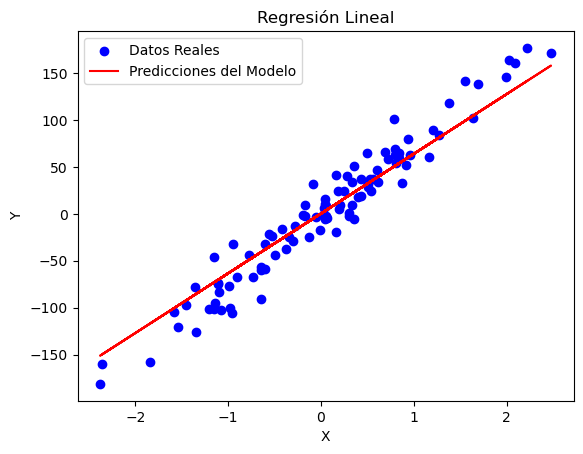

In [32]:
import torch 
import torch.nn as nn  
import numpy as np  
from sklearn import datasets  
import matplotlib.pyplot as plt  

# Paso 0: Preparar los datos
# Generamos un conjunto de datos de regresión con 100 muestras, 1 característica y un poco de ruido.
# Los datos se generan usando datasets.make_regression(), que simula una relación lineal con algo de ruido.
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Convertimos los datos de NumPy a tensores de PyTorch (tipo float).
X = torch.from_numpy(X_numpy.astype(np.float32))  # Datos de entrada como tensor.
y = torch.from_numpy(y_numpy.astype(np.float32))  # Valores de salida como tensor.
y = y.view(y.shape[0], 1)  # Aseguramos que 'y' tenga forma de columna (100x1).

# Obtenemos el número de muestras y características.
n_samples, n_features = X.shape

# Paso 1: Diseñar el modelo
# Creamos un modelo lineal: f = wx + b, donde 'w' es el peso y 'b' es el sesgo.
input_size = n_features  # Número de características de entrada (en este caso, 1).
output_size = 1  # Número de características de salida (también 1).
model = nn.Linear(input_size, output_size)  # Creamos el modelo lineal.

# Paso 2: Definir la función de pérdida y el optimizador
learning_rate = 0.01  # Tasa de aprendizaje, controla el tamaño de los pasos al actualizar los pesos.

# Usamos el Error Cuadrático Medio (MSE) como función de pérdida.
criterion = nn.MSELoss()  
# Usamos el optimizador Stochastic Gradient Descent (SGD) para actualizar los parámetros del modelo.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Paso 3: Bucle de entrenamiento
num_epochs = 100  # Número de épocas, cuántas veces pasamos por el conjunto de datos.
for epoch in range(num_epochs):
    # Paso 3.1: Hacemos la predicción (forward pass).
    y_predicted = model(X)  # El modelo predice los valores de 'y' basados en 'X'.
    
    # Paso 3.2: Calculamos la pérdida.
    loss = criterion(y_predicted, y)  # Comparamos las predicciones con los valores reales.
    
    # Paso 3.3: Calculamos los gradientes (backward pass).
    loss.backward()  # Calculamos automáticamente los gradientes con respecto a la pérdida.
    
    # Paso 3.4: Actualizamos los pesos del modelo.
    optimizer.step()  # Actualizamos los parámetros del modelo usando los gradientes.

    # Reiniciamos los gradientes para evitar acumulación en la siguiente iteración.
    optimizer.zero_grad()  

    # Imprimimos el progreso cada 10 épocas.
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')  # Mostramos la pérdida actual.

# Paso 4: Visualizar los resultados
predicted = model(X).detach().numpy()  # Obtenemos las predicciones del modelo y convertimos a NumPy.

# Creamos un gráfico para comparar los datos reales y las predicciones.
plt.scatter(X_numpy, y_numpy, color='blue', label='Datos Reales')  # Graficamos los datos reales en azul.
plt.plot(X_numpy, predicted, color='red', label='Predicciones del Modelo')  # Graficamos las predicciones en rojo.
plt.xlabel('X')  # Etiqueta del eje X.
plt.ylabel('Y')  # Etiqueta del eje Y.
plt.title('Regresión Lineal')  # Título del gráfico.
plt.legend()  # Mostramos la leyenda.
plt.show()  # Mostramos el gráfico.


### Regresión logística

In [33]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Paso 0: Preparar los datos
# Cargamos el conjunto de datos de cáncer de mama.
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target  # X son las características, y son las etiquetas (0 o 1).

# Obtenemos el número de muestras y características.
n_samples, n_features = X.shape

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Escalamos los datos (normalización) para mejorar la convergencia del modelo.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Ajustamos el escalador y transformamos los datos de entrenamiento.
X_test = sc.transform(X_test)  # Transformamos los datos de prueba con el mismo escalador.

# Convertimos los datos a tensores de PyTorch (tipo float).
X_train = torch.from_numpy(X_train.astype(np.float32))  # Datos de entrada de entrenamiento como tensor.
X_test = torch.from_numpy(X_test.astype(np.float32))  # Datos de entrada de prueba como tensor.
y_train = torch.from_numpy(y_train.astype(np.float32))  # Etiquetas de entrenamiento como tensor.
y_test = torch.from_numpy(y_test.astype(np.float32))  # Etiquetas de prueba como tensor.

# Aseguramos que 'y_train' y 'y_test' tengan la forma adecuada (número de muestras, 1).
y_train = y_train.view(y_train.shape[0], 1)  
y_test = y_test.view(y_test.shape[0], 1)  

# Paso 1: Diseñar el modelo
# Creamos un modelo lineal con función sigmoide al final para clasificar las salidas entre 0 y 1.
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)  # Capa lineal con 'n_input_features' de entrada y 1 salida.

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))  # Aplicamos la función sigmoide a la salida de la capa lineal.
        return y_pred

model = Model(n_features)  # Instanciamos el modelo con el número de características.

# Paso 2: Definir la función de pérdida y el optimizador
num_epochs = 100  # Número de épocas para el entrenamiento.
learning_rate = 0.01  # Tasa de aprendizaje, controla el tamaño de los pasos al actualizar los pesos.

# Usamos la función de pérdida de entropía cruzada binaria (BCELoss) para clasificación binaria.
criterion = nn.BCELoss()  
# Usamos el optimizador Stochastic Gradient Descent (SGD) para actualizar los parámetros del modelo.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Paso 3: Bucle de entrenamiento
for epoch in range(num_epochs):
    # Paso 3.1: Hacemos la predicción (forward pass).
    y_pred = model(X_train)  # El modelo predice los valores de 'y' basados en 'X_train'.
    
    # Paso 3.2: Calculamos la pérdida.
    loss = criterion(y_pred, y_train)  # Comparamos las predicciones con los valores reales.

    # Paso 3.3: Calculamos los gradientes (backward pass).
    loss.backward()  # Calculamos automáticamente los gradientes con respecto a la pérdida.
    
    # Paso 3.4: Actualizamos los pesos del modelo.
    optimizer.step()  # Actualizamos los parámetros del modelo usando los gradientes.

    # Reiniciamos los gradientes para evitar acumulación en la siguiente iteración.
    optimizer.zero_grad()  

    # Imprimimos el progreso cada 10 épocas.
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')  # Mostramos la pérdida actual.

# Evaluación sin calcular gradientes
with torch.no_grad():
    y_predicted = model(X_test)  # Usamos el modelo para predecir los valores de 'y_test'.
    y_predicted_cls = y_predicted.round()  # Convertimos las probabilidades a clases (0 o 1) redondeando.    
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # Calcula la precisión comparando las predicciones con las etiquetas verdaderas.
    print(f'accuracy: {acc.item():.4f}')  # Imprime la precisión del modelo en el conjunto de prueba.

epoch: 10, loss = 0.6303
epoch: 20, loss = 0.5034
epoch: 30, loss = 0.4260
epoch: 40, loss = 0.3741
epoch: 50, loss = 0.3368
epoch: 60, loss = 0.3085
epoch: 70, loss = 0.2862
epoch: 80, loss = 0.2681
epoch: 90, loss = 0.2530
epoch: 100, loss = 0.2403
accuracy: 0.9123


### Softmax y Crossentropy

In [34]:
import torch
import torch.nn as nn
import numpy as np

# Representación de un flujo de datos en una red neuronal
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# La función Softmax aplica la función exponencial a cada elemento y normaliza
# dividiendo por la suma de todas estas exponenciales
# -> comprime la salida para que esté entre 0 y 1 = probabilidad
# la suma de todas las probabilidades es 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)  # Devuelve las probabilidades usando Softmax.

# Ejemplo de uso con NumPy
x = np.array([2.0, 1.0, 0.1])  # Datos de entrada.
outputs = softmax(x)  # Aplica la función Softmax.
print('NumPy Softmax:', outputs)  # Imprime las probabilidades calculadas.

# Ejemplo de uso con PyTorch
x = torch.tensor([2.0, 1.0, 0.1])  # Datos de entrada como tensor.
outputs = torch.softmax(x, dim=0)  # Aplica la función Softmax en PyTorch.
print('PyTorch Softmax:', outputs)  # Imprime las probabilidades calculadas.

# Entropía cruzada
# La pérdida de entropía cruzada, o pérdida logarítmica, mide el rendimiento de un modelo de clasificación 
# cuya salida es un valor de probabilidad entre 0 y 1. 
# -> la pérdida aumenta a medida que la probabilidad predicha se desvía de la etiqueta real
def cross_entropy(actual, predicted):
    EPS = 1e-15  # Para evitar problemas de log(0)
    predicted = np.clip(predicted, EPS, 1 - EPS)  # Recorta las predicciones para evitar log(0).
    loss = -np.sum(actual * np.log(predicted))  # Calcula la pérdida de entropía cruzada.
    return loss  # Devuelve la pérdida.

# y debe estar codificado en one-hot
# si la clase es 0: [1 0 0]
# si la clase es 1: [0 1 0]
# si la clase es 2: [0 0 1]
Y = np.array([1, 0, 0])  # Etiqueta real en formato one-hot.
Y_pred_good = np.array([0.7, 0.2, 0.1])  # Predicción buena.
Y_pred_bad = np.array([0.1, 0.3, 0.6])   # Predicción mala.
l1 = cross_entropy(Y, Y_pred_good)  # Calcula la pérdida para la predicción buena.
l2 = cross_entropy(Y, Y_pred_bad)  # Calcula la pérdida para la predicción mala.
print(f'NumPy Pérdida 1: {l1:.4f}')  # Imprime la pérdida de la predicción buena.
print(f'NumPy Pérdida 2: {l2:.4f}')  # Imprime la pérdida de la predicción mala.

# CrossEntropyLoss en PyTorch (aplica Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = pérdida de verosimilitud negativa
loss = nn.CrossEntropyLoss()  # Inicializa la función de pérdida de entropía cruzada.

# Y (=target) contiene etiquetas de clase, no one-hot
Y = torch.tensor([0])  # Etiqueta de clase real como tensor.

# input es de tamaño nSamples x nClasses = 1 x 3
# y_pred (=input) debe ser logits, es decir, las puntuaciones sin normalizar para cada clase
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])  # Predicción buena como tensor.
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])  # Predicción mala como tensor.
l1 = loss(Y_pred_good, Y)  # Calcula la pérdida para la predicción buena.
l2 = loss(Y_pred_bad, Y)  # Calcula la pérdida para la predicción mala.

print(f'PyTorch Pérdida 1: {l1.item():.4f}')  # Imprime la pérdida de la predicción buena.
print(f'PyTorch Pérdida 2: {l2.item():.4f}')  # Imprime la pérdida de la predicción mala.

# Obtener predicciones
_, predictions1 = torch.max(Y_pred_good, 1)  # Obtiene la clase con mayor probabilidad de la predicción buena.
_, predictions2 = torch.max(Y_pred_bad, 1)  # Obtiene la clase con mayor probabilidad de la predicción mala.
print(f'Clase Actual: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')  # Imprime la clase real y las predicciones.

# Permite calcular la pérdida para múltiples muestras en un lote.

# Y es de tamaño nBatch = 3
# cada elemento tiene etiqueta de clase: 0, 1 o 2
Y = torch.tensor([2, 0, 1])  # Etiquetas de clase reales en un lote.

# input es de tamaño nBatch x nClasses = 3 x 3
# Y_pred son logits (no softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9],  # predice clase 2
     [1.2, 0.1, 0.3],  # predice clase 0
     [0.3, 2.2, 0.2]])  # predice clase 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],  # predice clase 0
     [0.1, 0.3, 1.5],  # predice clase 2
     [1.2, 0.2, 0.5]])  # predice clase 0

l1 = loss(Y_pred_good, Y)  # Calcula la pérdida para la predicción buena en un lote.
l2 = loss(Y_pred_bad, Y)  # Calcula la pérdida para la predicción mala en un lote.
print(f'Pérdida del lote 1:  {l1.item():.4f}')  # Imprime la pérdida de la predicción buena en un lote.
print(f'Pérdida del lote 2: {l2.item():.4f}')  # Imprime la pérdida de la predicción mala en un lote.

# Obtener predicciones
_, predictions1 = torch.max(Y_pred_good, 1)  # Obtiene la clase con mayor probabilidad de la predicción buena en el lote.
_, predictions2 = torch.max(Y_pred_bad, 1)  # Obtiene la clase con mayor probabilidad de la predicción mala en el lote.
print(f'Clase Actual: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')  # Imprime las clases reales y las predicciones.

# Clasificación binaria
class NeuralNet1(nn.Module):  # Definición de una red neuronal para clasificación binaria.
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # Capa lineal de entrada a oculta.
        self.relu = nn.ReLU()  # Función de activación ReLU.
        self.linear2 = nn.Linear(hidden_size, 1)  # Capa lineal de oculta a salida.

    def forward(self, x):
        out = self.linear1(x)  # Cálculo de la capa lineal.
        out = self.relu(out)  # Aplicación de la función de activación.
        out = self.linear2(out)  # Cálculo de la salida.
        # Sigmoid al final
        y_pred = torch.sigmoid(out)  # Aplica sigmoid para obtener probabilidades.
        return y_pred  # Devuelve las probabilidades predichas.

model = NeuralNet1(input_size=28*28, hidden_size=5)  # Inicializa el modelo para datos de entrada de 28x28 y 5 neuronas ocultas.
criterion = nn.BCELoss()  # Inicializa la función de pérdida de entropía cruzada binaria.

# Problema multiclasificación
class NeuralNet2(nn.Module):  # Definición de una red neuronal para clasificación multiclase.
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # Capa lineal de entrada a oculta.
        self.relu = nn.ReLU()  # Función de activación ReLU.
        self.linear2 = nn.Linear(hidden_size, num_classes)  # Capa lineal de oculta a salida.

    def forward(self, x):
        out = self.linear1


NumPy Softmax: [0.65900114 0.24243297 0.09856589]
PyTorch Softmax: tensor([0.6590, 0.2424, 0.0986])
NumPy Pérdida 1: 0.3567
NumPy Pérdida 2: 2.3026
PyTorch Pérdida 1: 0.4170
PyTorch Pérdida 2: 1.8406
Clase Actual: 0, Y_pred1: 0, Y_pred2: 1
Pérdida del lote 1:  0.2834
Pérdida del lote 2: 1.6418
Clase Actual: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


### Funciones de activación

In [35]:
import torch.nn.functional as F  # Funciones útiles para operaciones en redes neuronales

# Creamos un tensor con algunos valores. Este tensor representa una entrada a la red neuronal.
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# Aplicamos la función de activación Softmax
# Softmax convierte los valores en probabilidades que suman 1.
output = torch.softmax(x, dim=0)  # Aquí estamos aplicando softmax a lo largo del primer eje
print(f'Softmax: {output}')  # Imprimimos el resultado

# También podemos usar la clase Softmax de nn
sm = nn.Softmax(dim=0)  # Creamos una instancia de la clase Softmax
output = sm(x)  # Aplicamos softmax a nuestro tensor
print(f'Softmax: {output}')  # Imprimimos el resultado

# Aplicamos la función de activación Sigmoid
# Sigmoid convierte los valores en un rango entre 0 y 1.
output = torch.sigmoid(x)  # Usamos la función sigmoid directamente
print(f'Sigmoid: {output}')  # Imprimimos el resultado

# También podemos usar la clase Sigmoid de nn
s = nn.Sigmoid()  # Creamos una instancia de la clase Sigmoid
output = s(x)  # Aplicamos sigmoid a nuestro tensor
print(f'Sigmoid: {output}')  # Imprimimos el resultado

# Aplicamos la función de activación Tanh
# Tanh normaliza los valores entre -1 y 1.
output = torch.tanh(x)  # Usamos la función tanh directamente
print(f'Tanh: {output}')  # Imprimimos el resultado

# También podemos usar la clase Tanh de nn
t = nn.Tanh()  # Creamos una instancia de la clase Tanh
output = t(x)  # Aplicamos tanh a nuestro tensor
print(f'Tahn: {output}')  # Imprimimos el resultado

# Aplicamos la función de activación ReLU
# ReLU convierte cualquier valor negativo a cero y deja los positivos igual.
output = torch.relu(x)  # Usamos la función relu directamente
print(f'ReLu: {output}')  # Imprimimos el resultado

# También podemos usar la clase ReLU de nn
relu = nn.ReLU()  # Creamos una instancia de la clase ReLU
output = relu(x)  # Aplicamos relu a nuestro tensor
print(f'ReLu: {output}')  # Imprimimos el resultado

# Aplicamos la función de activación Leaky ReLU
# Leaky ReLU permite un pequeño gradiente cuando el valor es negativo.
output = F.leaky_relu(x)  # Usamos la función leaky relu directamente
print(f'Leaky ReLu: {output}')  # Imprimimos el resultado

# También podemos usar la clase LeakyReLU de nn
lrelu = nn.LeakyReLU()  # Creamos una instancia de la clase Leaky ReLU
output = lrelu(x)  # Aplicamos leaky relu a nuestro tensor
print(f'Leaky ReLu: {output}')  # Imprimimos el resultado

# En este punto, hemos visto cómo aplicar diferentes funciones de activación a tensores.

# Ahora, veremos dos opciones para crear una red neuronal simple.

# Opción 1: Crear módulos de red neuronal
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        # Creamos la primera capa lineal que toma el tamaño de entrada y lo transforma a un tamaño oculto.
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()  # Usamos ReLU como función de activación
        # Creamos la segunda capa lineal que toma el tamaño oculto y produce una salida de tamaño 1.
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  # Usamos Sigmoid para la salida final

    def forward(self, x):
        out = self.linear1(x)  # Pasamos los datos por la primera capa
        out = self.relu(out)  # Aplicamos ReLU
        out = self.linear2(out)  # Pasamos por la segunda capa
        out = self.sigmoid(out)  # Aplicamos Sigmoid a la salida final
        return out  # Retornamos la salida de la red

# Opción 2: Usar funciones de activación directamente en el paso hacia adelante
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        # Creamos la primera capa lineal
        self.linear1 = nn.Linear(input_size, hidden_size)
        # Creamos la segunda capa lineal
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Aplicamos la función de activación ReLU directamente en la salida de la primera capa
        out = torch.relu(self.linear1(x))
        # Aplicamos la función de activación Sigmoid en la salida de la segunda capa
        out = torch.sigmoid(self.linear2(out))
        return out  # Retornamos la salida de la red


Softmax: tensor([0.0120, 0.0889, 0.2418, 0.6572])
Softmax: tensor([0.0120, 0.0889, 0.2418, 0.6572])
Sigmoid: tensor([0.2689, 0.7311, 0.8808, 0.9526])
Sigmoid: tensor([0.2689, 0.7311, 0.8808, 0.9526])
Tanh: tensor([-0.7616,  0.7616,  0.9640,  0.9951])
Tahn: tensor([-0.7616,  0.7616,  0.9640,  0.9951])
ReLu: tensor([0., 1., 2., 3.])
ReLu: tensor([0., 1., 2., 3.])
Leaky ReLu: tensor([-0.0100,  1.0000,  2.0000,  3.0000])
Leaky ReLu: tensor([-0.0100,  1.0000,  2.0000,  3.0000])


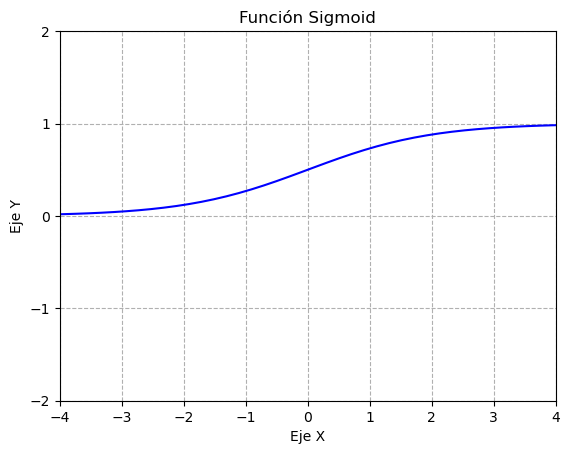

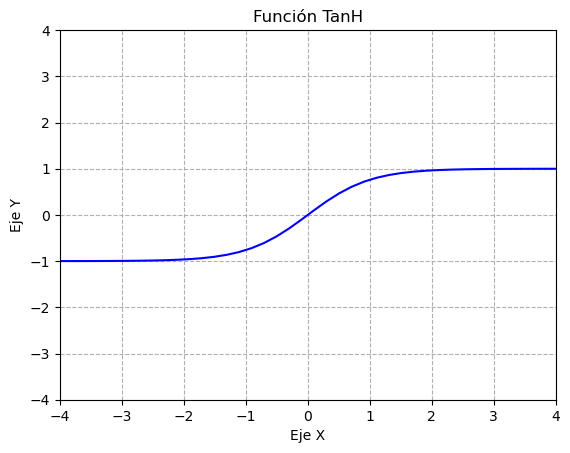

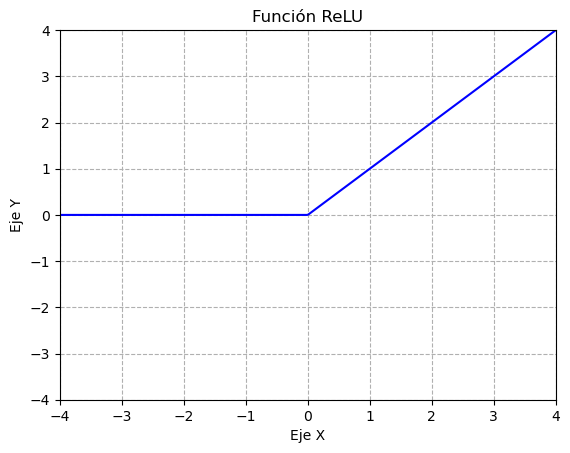

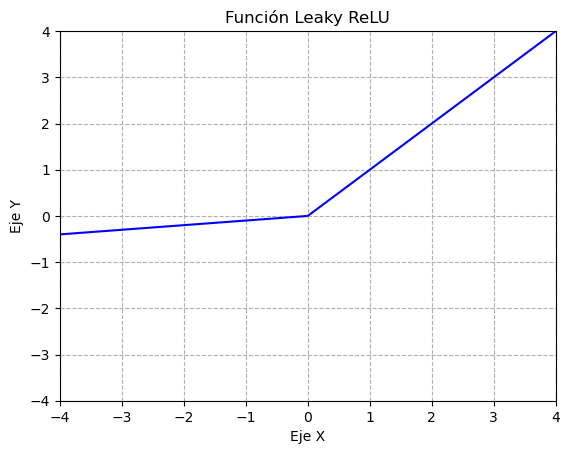

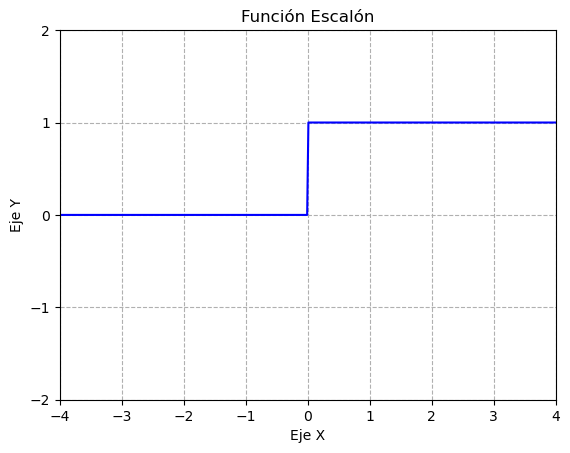

done


In [36]:
# Definimos la función Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))  # La función Sigmoid se define aquí

# Creamos un rango de valores para x desde -10 hasta 10 con 10 puntos
x = np.linspace(-10, 10, 10)
# Creamos un rango de valores más fino para y desde -10 hasta 10 con 100 puntos
y = np.linspace(-10, 10, 100)

# Creamos una figura para el gráfico
fig = plt.figure()
# Graficamos la función Sigmoid
plt.plot(y, sigmoid(y), 'b', label='linspace(-10,10,100)')

# Añadimos una cuadrícula al gráfico
plt.grid(linestyle='--')

# Etiquetas para los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Título del gráfico
plt.title('Función Sigmoid')

# Definimos las marcas en el eje X
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
# Definimos las marcas en el eje Y
plt.yticks([-2, -1, 0, 1, 2])

# Establecemos los límites del eje Y
plt.ylim(-2, 2)
# Establecemos los límites del eje X
plt.xlim(-4, 4)

# Mostramos el gráfico
plt.show()
#plt.savefig('sigmoid.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función TanH
fig = plt.figure()

# Definimos la función TanH usando la función Sigmoid
tanh = lambda x: 2 * sigmoid(2 * x) - 1  # TanH se basa en la función Sigmoid

# Repetimos el proceso para crear y graficar la función TanH
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 100)

plt.plot(y, tanh(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función TanH')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('tanh.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función ReLU
fig = plt.figure()

# Definimos la función ReLU
relu = lambda x: np.where(x >= 0, x, 0)  # ReLU devuelve 0 para valores negativos

# Repetimos el proceso para crear y graficar la función ReLU
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 1000)

plt.plot(y, relu(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('relu.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función Leaky ReLU
fig = plt.figure()

# Definimos la función Leaky ReLU
leakyrelu = lambda x: np.where(x >= 0, x, 0.1 * x)  # Leaky ReLU permite un pequeño gradiente

# Repetimos el proceso para crear y graficar la función Leaky ReLU
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 1000)

plt.plot(y, leakyrelu(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función Leaky ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('lrelu.png')  # Guardamos el gráfico como una imagen (opcional)

# Creamos otra figura para la función escalón
fig = plt.figure()

# Definimos la función escalón
bstep = lambda x: np.where(x >= 0, 1, 0)  # La función escalón devuelve 1 para valores no negativos

# Repetimos el proceso para crear y graficar la función escalón
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 1000)

plt.plot(y, bstep(y), 'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Función Escalón')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('step.png')  # Guardamos el gráfico como una imagen (opcional)

# Imprimimos 'done' para indicar que todo ha terminado
print('done')


### Teorema de Bayes

In [37]:
# Definimos las probabilidades
P_E = 0.01  # P(E): probabilidad de tener la enfermedad
P_S_given_E = 0.9  # P(S|E): probabilidad de observar el síntoma dado que tiene la enfermedad
P_S_given_not_E = 0.1  # P(S|¬E): probabilidad de observar el síntoma dado que NO tiene la enfermedad

# Calcular P(S): probabilidad total del síntoma
P_not_E = 1 - P_E  # P(¬E): probabilidad de no tener la enfermedad
P_S = P_S_given_E * P_E + P_S_given_not_E * P_not_E  # P(S)

# Aplicamos el teorema de Bayes
P_E_given_S = (P_S_given_E * P_E) / P_S  # P(E|S): probabilidad de tener la enfermedad dado el síntoma

# Resultados
print(f"Probabilidad de tener la enfermedad dado el síntoma: {P_E_given_S:.4f}")

Probabilidad de tener la enfermedad dado el síntoma: 0.0833


### Support Vector Machine

#### Descripción del conjunto de datos de Iris

El conjunto de datos de **Iris** es uno de los más utilizados en el aprendizaje automático y la estadística. Fue introducido por el botánico y estadístico Ronald Fisher en 1936. Este dataset contiene información sobre tres especies de flores del género *Iris*, con un total de 150 muestras.

##### 1. **Características**
Cada flor en el conjunto de datos está descrita por cuatro atributos (o características):

- **Sepal length (cm)**: La longitud del sépalo (en centímetros).
- **Sepal width (cm)**: El ancho del sépalo (en centímetros).
- **Petal length (cm)**: La longitud del pétalo (en centímetros).
- **Petal width (cm)**: El ancho del pétalo (en centímetros).

Los sépalos y pétalos son partes de las flores que sirven como características clave para diferenciar entre las especies de *Iris*.

##### 2. **Clases (Especies)**
El conjunto de datos tiene tres especies de *Iris*, y cada una está representada por una clase numérica:

- `0`: *Iris setosa*
- `1`: *Iris versicolor*
- `2`: *Iris virginica*

##### 3. **Objetivo**
El objetivo típico al trabajar con este conjunto de datos es predecir la especie de una flor (la clase) en función de las cuatro características mencionadas anteriormente.

##### Ejemplo de fila
En el siguiente ejemplo se muestra una fila con las características de una flor y su especie correspondiente:

- **Sepal length**: 5.1 cm
- **Sepal width**: 3.5 cm
- **Petal length**: 1.4 cm
- **Petal width**: 0.2 cm
- **Target (Especie)**: 0 (corresponde a la especie *Iris setosa*)

##### Salida en tu código
La tabla mostrada en tu código representa las primeras cinco filas del conjunto de datos, con las cuatro características (`sepal length`, `sepal width`, `petal length`, `petal width`) y una columna adicional `target`, que indica la especie de la flor (0 para *setosa*, 1 para *versicolor*, y 2 para *virginica*).

##### Ejemplo de la primera fila:
- **Fila 1**:
  - `sepal length`: 5.1 cm
  - `sepal width`: 3.5 cm
  - `petal length`: 1.4 cm
  - `petal width`: 0.2 cm
  - `target`: 0 (esta flor es de la especie *Iris setosa*)

##### Modelo SVM
En el siguiente código se usan estas características para entrenar un modelo a que aprenda a clasificar correctamente nuevas flores en una de las tres especies.


In [39]:
# Importamos las bibliotecas necesarias
import torch  # Biblioteca para manejo de tensores
import numpy as np  # Biblioteca para operaciones numéricas
import pandas as pd  # Biblioteca para manejo de datos en formato de tablas
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.svm import SVC  # Implementación del clasificador SVM
from sklearn.metrics import accuracy_score  # Para calcular la precisión del modelo

# Cargar el conjunto de datos de Iris
iris = load_iris()  # Cargamos el conjunto de datos
X = iris.data  # Las características (atributos) de las flores
y = iris.target  # Las clases (especies) de las flores

# Convertimos los datos a un DataFrame de pandas para un manejo más fácil
data = pd.DataFrame(X, columns=iris.feature_names)  # Creamos un DataFrame con las características
data['target'] = y  # Añadimos la columna de las clases al DataFrame

# Mostramos las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())  # Muestra las primeras 5 filas del DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos el 80% de los datos para entrenar y el 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tensor para las características de entrenamiento
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tensor para las características de prueba
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)  # Tensor para las clases de entrenamiento
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)  # Tensor para las clases de prueba

# Crear el modelo SVM
# Usamos un clasificador SVM con un kernel lineal
svm_model = SVC(kernel='linear')

# Entrenar el modelo
# El modelo se ajusta a los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo calculando la precisión
# Comparamos las predicciones con las clases reales del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")  # Imprimimos la precisión del modelo

# Imprimir algunas de las predicciones y las clases reales
print("\nEjemplo de predicciones en el conjunto de prueba:")
for i in range(5):  # Imprimir las primeras 5 predicciones
    print(f"Predicción: {y_pred[i]}, Clase real: {y_test[i]}")

Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Precisión del modelo SVM: 1.0000

Ejemplo de predicciones en el conjunto de prueba:
Predicción: 1, Clase real: 1
Predicción: 0, Clase real: 0
Predicción: 2, Clase real: 2
Predicción: 1, Clase real: 1
Predicción: 1, Clase real: 1


### K Nearest Neighbours

In [40]:
import torch
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.neighbors import KNeighborsClassifier  # Implementación del clasificador KNN
from sklearn.metrics import accuracy_score  # Para calcular la precisión del modelo

# Cargar el conjunto de datos de Iris
iris = load_iris()  # Cargamos el conjunto de datos
X = iris.data  # Las características (atributos) de las flores
y = iris.target  # Las clases (especies) de las flores

# Convertimos los datos a un DataFrame de pandas para un manejo más fácil
data = pd.DataFrame(X, columns=iris.feature_names)  # Creamos un DataFrame con las características
data['target'] = y  # Añadimos la columna de las clases al DataFrame

# Mostramos las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())  # Muestra las primeras 5 filas del DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos el 80% de los datos para entrenar y el 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tensor para las características de entrenamiento
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tensor para las características de prueba
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)  # Tensor para las clases de entrenamiento
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)  # Tensor para las clases de prueba

# Crear el modelo de KNN
# Usaremos 5 vecinos más cercanos (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
# El modelo se ajusta a los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el modelo calculando la precisión
# Comparamos las predicciones con las clases reales del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.4f}")  # Imprimimos la precisión del modelo

# Imprimir algunas de las predicciones y las clases reales
print("\nEjemplo de predicciones en el conjunto de prueba:")
for i in range(5):  # Imprimir las primeras 5 predicciones
    print(f"Predicción: {y_pred[i]}, Clase real: {y_test[i]}")


Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Precisión del modelo KNN: 1.0000

Ejemplo de predicciones en el conjunto de prueba:
Predicción: 1, Clase real: 1
Predicción: 0, Clase real: 0
Predicción: 2, Clase real: 2
Predicción: 1, Clase real: 1
Predicción: 1, Clase real: 1


### Random Forest

In [41]:
import torch
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # Para cargar el conjunto de datos de Iris
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestClassifier  # Implementación del clasificador Random Forest
from sklearn.metrics import accuracy_score  # Para calcular la precisión del modelo

# Cargar el conjunto de datos de Iris
iris = load_iris()  # Cargamos el conjunto de datos
X = iris.data  # Las características (atributos) de las flores
y = iris.target  # Las clases (especies) de las flores

# Convertimos los datos a un DataFrame de pandas para un manejo más fácil
data = pd.DataFrame(X, columns=iris.feature_names)  # Creamos un DataFrame con las características
data['target'] = y  # Añadimos la columna de las clases al DataFrame

# Mostramos las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(data.head())  # Muestra las primeras 5 filas del DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos el 80% de los datos para entrenar y el 20% para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tensor para las características de entrenamiento
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tensor para las características de prueba
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)  # Tensor para las clases de entrenamiento
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)  # Tensor para las clases de prueba

# Crear el modelo de Random Forest
# El número de estimadores (árboles) se establece en 100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
# El modelo se ajusta a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo calculando la precisión
# Comparamos las predicciones con las clases reales del conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")  # Imprimimos la precisión del modelo

# Imprimir algunas de las predicciones y las clases reales
print("\nEjemplo de predicciones en el conjunto de prueba:")
for i in range(5):  # Imprimir las primeras 5 predicciones
    print(f"Predicción: {y_pred[i]}, Clase real: {y_test[i]}")

Primeras filas del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Precisión del modelo: 1.0000

Ejemplo de predicciones en el conjunto de prueba:
Predicción: 1, Clase real: 1
Predicción: 0, Clase real: 0
Predicción: 2, Clase real: 2
Predicción: 1, Clase real: 1
Predicción: 1, Clase real: 1


### Red Neuronal Básica

Linear(in_features=2, out_features=8, bias=False)
Salida de M1: tensor([[ 4.0002,  2.0992, -1.9444,  3.9759,  1.2679, -2.3396,  3.3210, -4.0740],
        [ 3.4743,  1.6821, -1.6300,  3.5318,  0.9266, -1.9028,  2.7933, -3.5006],
        [ 1.7933, -0.1884, -0.4009,  2.4111, -0.8283, -0.0154,  0.7598, -1.5236],
        [ 6.2160,  1.7089, -2.3741,  7.0427,  0.0498, -2.2145,  4.1581, -5.9143]],
       grad_fn=<MmBackward0>)
Linear(in_features=8, out_features=1, bias=False)
Salida de M2: tensor([-0.8078, -0.6526,  0.0296, -0.7166], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (yhat): tensor([-0.9002, -0.8480, -0.9326, -2.1263], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Pérdida inicial: 24.29840850830078
Pérdida calculada manualmente: 24.29840850830078


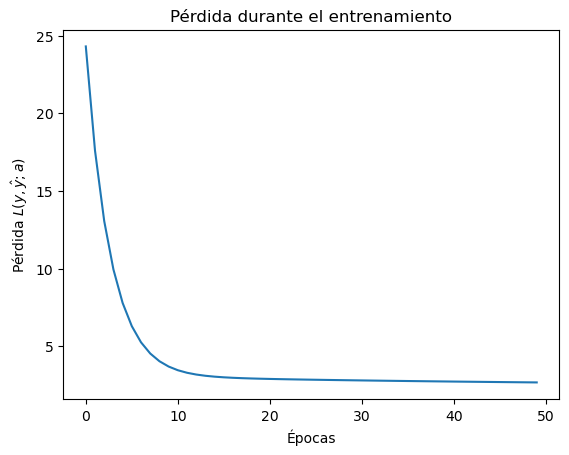

Predicciones finales (f(x)): tensor([3.3581, 2.8817, 1.2255, 4.8333], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])


In [39]:
import torch
import torch.nn as nn  # Módulo de redes neuronales en PyTorch
from torch.optim import SGD  # Algoritmo de optimización Stochastic Gradient Descent
import numpy as np  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca para visualización de gráficos

# Definimos los datos de entrada (x) y salida (y)
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]]).float()  # Datos de entrada
y = torch.tensor([1, 5, 2, 5]).float()  # Datos de salida esperada

# Definimos la primera capa de la red neuronal (M1)
M1 = nn.Linear(2, 8, bias=False)  # Capa que toma 2 entradas y produce 8 salidas
print(M1)  # Mostramos la estructura de la capa

# Aplicamos la primera capa a los datos de entrada
output_M1 = M1(x)  # Pasamos x a través de M1
print("Salida de M1:", output_M1)  # Mostramos la salida de M1

# Definimos la segunda capa de la red neuronal (M2)
M2 = nn.Linear(8, 1, bias=False)  # Capa que toma 8 entradas y produce 1 salida
print(M2)  # Mostramos la estructura de la capa

# Aplicamos la segunda capa a la salida de la primera capa
output_M2 = M2(output_M1).squeeze()  # Pasamos la salida de M1 a través de M2 y eliminamos dimensiones extra
print("Salida de M2:", output_M2)  # Mostramos la salida de M2

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)  # Mostramos los valores reales de y

# Definimos nuestra propia red neuronal
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Inicializamos las capas de la red
        self.Matrix1 = nn.Linear(2, 8, bias=False)  # Primera capa
        self.Matrix2 = nn.Linear(8, 1, bias=False)  # Segunda capa

    def forward(self, x):
        # Definimos cómo se pasa la entrada a través de la red
        x = self.Matrix1(x)  # Aplicamos la primera capa
        x = self.Matrix2(x)  # Aplicamos la segunda capa
        return x.squeeze()  # Retornamos la salida eliminando dimensiones extra

# Creamos una instancia de nuestra red neuronal
f = MyNeuralNet()  # Inicializamos el modelo

# Hacemos una predicción usando la red neuronal
yhat = f(x)  # Pasamos los datos de entrada a través de la red
print("Predicciones (yhat):", yhat)  # Mostramos las predicciones

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)  # Mostramos los valores reales de y

# Definimos la función de pérdida (loss function)
L = nn.MSELoss()  # Mean Squared Error (MSE) como función de pérdida
loss_value = L(y, yhat)  # Calculamos la pérdida entre las predicciones y las salidas reales
print("Pérdida inicial:", loss_value.item())  # Mostramos el valor de la pérdida

# Calculamos la pérdida manualmente para verificar
manual_loss = torch.mean((y - yhat) ** 2)  # Cálculo manual de la pérdida MSE
print("Pérdida calculada manualmente:", manual_loss.item())  # Mostramos el valor de la pérdida calculada manualmente

# Configuramos el optimizador
opt = SGD(f.parameters(), lr=0.001)  # Usamos el optimizador SGD con una tasa de aprendizaje de 0.001

# Lista para almacenar las pérdidas en cada época
losses = []
for _ in range(50):  # Entrenamos el modelo durante 50 épocas
    opt.zero_grad()  # Limpiamos el gradiente del optimizador del paso anterior
    loss_value = L(f(x), y)  # Calculamos la pérdida para la predicción actual
    loss_value.backward()  # Calculamos el gradiente de la pérdida
    opt.step()  # Actualizamos los parámetros del modelo
    losses.append(loss_value.item())  # Almacenamos el valor de la pérdida

# Visualizamos las pérdidas a lo largo de las épocas
plt.plot(losses)  # Graficamos la pérdida por época
plt.ylabel('Pérdida $L(y,\hat{y};a)$')  # Etiqueta del eje y
plt.xlabel('Épocas')  # Etiqueta del eje x
plt.title('Pérdida durante el entrenamiento')  # Título del gráfico
plt.show()  # Mostramos el gráfico

# Predicción final después del entrenamiento
final_predictions = f(x)  # Realizamos una predicción final
print("Predicciones finales (f(x)):", final_predictions)  # Mostramos las predicciones finales
print("Salida esperada (y):", y)  # Mostramos los valores reales de y


### Red Neuronal Profunda

Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f(x)): tensor([3.2638, 2.8198, 1.3437, 4.9073], grad_fn=<SqueezeBackward0>)
Tensor de entrada: tensor([[ 4,  6,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])
Salida de ReLU: tensor([[4, 6, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])


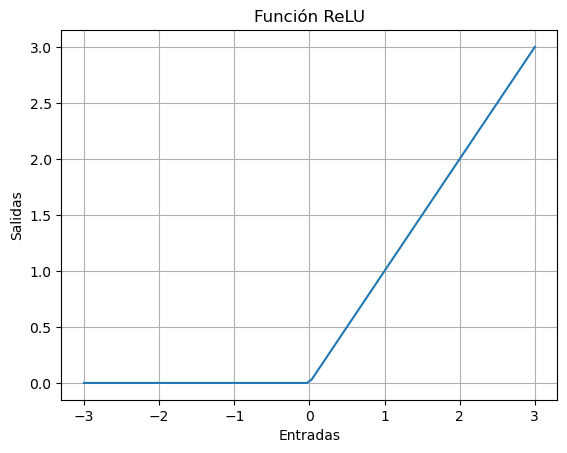

Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f2(x)): tensor([2.7503, 2.5854, 1.8542, 5.2768], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f3(x)): tensor([2.0208, 3.5897, 1.9184, 5.1303], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f4(x)): tensor([1.4777, 4.3559, 2.0017, 5.0495], grad_fn=<SqueezeBackward0>)
Salida esperada (y): tensor([1., 5., 2., 5.])
Predicciones (f5(x)): tensor([1.0003, 4.9995, 2.0000, 5.0000], grad_fn=<SqueezeBackward0>)


In [42]:
# Importamos las bibliotecas necesarias
import torch  # Biblioteca para el manejo de tensores
import torch.nn as nn  # Módulo de redes neuronales en PyTorch
from torch.optim import SGD  # Algoritmo de optimización Stochastic Gradient Descent
import numpy as np  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca para visualización de gráficos

# Definimos los datos de entrada (x) y salida (y)
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]]).float()  # Datos de entrada
y = torch.tensor([1, 5, 2, 5]).float()  # Datos de salida esperada

# Definimos la primera red neuronal
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8, bias=False)  # Primera capa: 2 entradas, 8 salidas
        self.Matrix2 = nn.Linear(8, 1, bias=False)  # Segunda capa: 8 entradas, 1 salida
        
    def forward(self, x):
        x = self.Matrix1(x)  # Pasamos x a través de la primera capa
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una instancia de la red neuronal
f = MyNeuralNet()

# Configuramos el optimizador y la función de pérdida
opt = SGD(f.parameters(), lr=0.001)  # Usamos el optimizador SGD con una tasa de aprendizaje de 0.001
L = nn.MSELoss()  # Mean Squared Error (MSE) como función de pérdida

# Entrenamos el modelo
losses = []  # Lista para almacenar las pérdidas en cada época
for _ in range(50):  # Entrenamos durante 50 épocas
    opt.zero_grad()  # Limpiamos el gradiente del optimizador del paso anterior
    loss_value = L(f(x), y)  # Calculamos la pérdida
    loss_value.backward()  # Calculamos el gradiente de la pérdida
    opt.step()  # Actualizamos los parámetros del modelo
    losses.append(loss_value.item())  # Almacenamos el valor de la pérdida

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)

# Mostramos las predicciones iniciales
print("Predicciones (f(x)):", f(x))

# Definimos un tensor de entrada para aplicar la función de activación ReLU
x = torch.tensor([[4, 6, 2, -1, 6, 2, 5], [1, 6, 2, -6, 5, -3, 5]])
print("Tensor de entrada:", x)

# Creamos una instancia de la función de activación ReLU
R = nn.ReLU()  
print("Salida de ReLU:", R(x))  # Aplicamos ReLU al tensor de entrada

# Visualizamos la función ReLU
x = torch.linspace(-3, 3, 100)  # Creamos un rango de valores de -3 a 3
y = R(x)  # Aplicamos ReLU a los valores
plt.plot(x.numpy(), y.numpy())  # Graficamos la función ReLU
plt.grid()  # Añadimos una cuadrícula
plt.title('Función ReLU')  # Título del gráfico
plt.xlabel('Entradas')  # Etiqueta del eje x
plt.ylabel('Salidas')  # Etiqueta del eje y
plt.show()  # Mostramos el gráfico

# Definimos la segunda red neuronal que incluye la función de activación ReLU
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8, bias=False)  # Primera capa
        self.Matrix2 = nn.Linear(8, 1, bias=False)  # Segunda capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

def train_model(x,y,f, n_epochs=50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()
    
    # Entrenamos el modelo
    losses = []  # Lista para almacenar las pérdidas en cada época
    for _ in range(n_epochs):  # Entrenamos durante 50 épocas
        opt.zero_grad() # Limpiamos el gradiente del optimizador del paso anterior
        loss_value = L(f(x), y) # Calculamos la pérdida
        loss_value.backward() # Calculamos el gradiente de la pérdida
        opt.step() # Actualizamos los parámetros del modelo
        losses.append(loss_value.item())  # Almacenamos el valor de la pérdida
    return f, losses

x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

# Creamos una nueva instancia de la segunda red neuronal
f2 = MyNeuralNet2()

# Entrenamos el modelo
f2, losses2 = train_model(x, y, f2, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del segundo modelo
print("Predicciones (f2(x)):", f2(x))

# Definimos la tercera red neuronal con más neuronas
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80, bias=False)  # Primera capa con 80 salidas
        self.Matrix2 = nn.Linear(80, 1, bias=False)  # Segunda capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una nueva instancia de la tercera red neuronal
f3 = MyNeuralNet3()

# Entrenamos el modelo
f3, losses3 = train_model(x, y, f3, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del tercer modelo
print("Predicciones (f3(x)):", f3(x))

# Definimos la cuarta red neuronal con capas densas
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)  # Primera capa con 80 salidas
        self.Matrix2 = nn.Linear(80, 1)  # Segunda capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.Matrix2(x)  # Pasamos la salida a través de la segunda capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una nueva instancia de la cuarta red neuronal
f4 = MyNeuralNet4()

# Entrenamos el modelo
f4, losses4 = train_model(x, y, f4, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del cuarto modelo
print("Predicciones (f4(x)):", f4(x))

# Definimos la quinta red neuronal con más capas
class MyNeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)  # Primera capa con 80 salidas
        self.Matrix2 = nn.Linear(80, 80)  # Segunda capa con 80 salidas
        self.Matrix3 = nn.Linear(80, 1)  # Tercera capa
        self.R = nn.ReLU()  # Función de activación ReLU
        
    def forward(self, x):
        x = self.R(self.Matrix1(x))  # Aplicamos la primera capa y luego ReLU
        x = self.R(self.Matrix2(x))  # Aplicamos la segunda capa y luego ReLU
        x = self.Matrix3(x)  # Pasamos la salida a través de la tercera capa
        return x.squeeze()  # Eliminamos dimensiones extra y retornamos la salida

# Creamos una nueva instancia de la quinta red neuronal
f5 = MyNeuralNet5()

# Entrenamos el modelo
f5, losses5 = train_model(x, y, f5, n_epochs=5000)  # Llamamos a la función para entrenar el modelo

# Mostramos los datos de salida esperada
print("Salida esperada (y):", y)
# Mostramos las predicciones del quinto modelo
print("Predicciones (f5(x)):", f5(x))


### MNIST

In [47]:
import torch
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Cargamos los datos
# Carga el dataset MNIST, que contiene imágenes de dígitos escritos a mano (28x28 píxeles).
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
# Creamos un DataLoader para cargar los datos en lotes de tamaño 32
dataset = DataLoader(train, 32)

# root especifica la carpeta donde se descargará el dataset.
# download=True descarga el dataset si no está disponible localmente.
# train=True obtiene el conjunto de entrenamiento.
# transform=ToTensor() convierte las imágenes en tensores.
# DataLoader(train, 32) carga los datos en lotes de tamaño 32.

# Definimos la red neuronal convolucional para clasificar imágenes
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        # Definimos la arquitectura de la red
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3, 3)),  # Capa convolucional que extrae características de la imagen
            nn.ReLU(),  # Función de activación ReLU
            nn.Conv2d(32, 64, (3, 3)),  # Segunda capa convolucional
            nn.ReLU(),  # Función de activación ReLU
            nn.Conv2d(64, 64, (3, 3)),  # Tercera capa convolucional
            nn.ReLU(),  # Función de activación ReLU
            nn.Flatten(),  # Aplanamos los datos para pasarlos a la capa totalmente conectada
            nn.Linear(64 * (28 - 6) * (28 - 6), 10)  # Capa totalmente conectada, salida para 10 clases (dígitos 0-9)
        )

# Las imágenes de entrada son de 28x28 píxeles, y al aplicar 3 capas Conv2D (sin padding) con kernels de 3x3, se reduce en 2 píxeles por lado en cada capa.
# Después de 3 capas, la imagen se reduce de 28 a 22 (28 - 3*2).
# En la primera capa, se aplican 32 filtros a la imagen de entrada (escala de grises), generando 32 mapas de características o "dimensiones".
# En la segunda capa, 64 filtros se aplican sobre los 32 mapas, generando 64 dimensiones en la salida.
# En la tercera capa, 64 filtros se aplican sobre los 64 mapas anteriores, manteniendo las 64 dimensiones.
# El tamaño final de la entrada a la capa Linear es 64 * 22 * 22 = 30976
    
    def forward(self, x): 
        # Método que define el paso hacia adelante de la red
        return self.model(x)

# Creamos una instancia del clasificador, la función de pérdida y el optimizador
clf = ImageClassifier().to('cpu')  # Movemos el modelo a la CPU
opt = Adam(clf.parameters(), lr=1e-3)  # Inicializamos el optimizador Adam
loss_fn = nn.CrossEntropyLoss()  # Definimos la función de pérdida de entropía cruzada

# Proceso de entrenamiento
if __name__ == "__main__": 
    for epoch in range(10):  # Entrenamos durante 10 épocas
        for batch in dataset:  # Iteramos sobre los lotes de datos
            X, y = batch  # Extraemos las imágenes y las etiquetas
            X, y = X.to('cpu'), y.to('cpu')  # Movemos los datos a la CPU
            yhat = clf(X)  # Realizamos la predicción
            loss = loss_fn(yhat, y)  # Calculamos la pérdida

            # Aplicamos retropropagación
            opt.zero_grad()  # Limpiamos los gradientes acumulados
            loss.backward()  # Calculamos los gradientes
            opt.step()  # Actualizamos los parámetros del modelo

        # Imprimimos la pérdida al final de cada época
        print(f"Epoch:{epoch} loss is {loss.item()}")
    
    # Guardamos el estado del modelo
    with open('model_state.pt', 'wb') as f: 
        save(clf.state_dict(), f)  # Guardamos los pesos del modelo


Epoch:0 loss is 0.06716224551200867
Epoch:1 loss is 0.003973584622144699
Epoch:2 loss is 0.000448561244411394
Epoch:3 loss is 7.787642243783921e-05
Epoch:4 loss is 0.00016380137822125107
Epoch:5 loss is 0.00820010993629694
Epoch:6 loss is 2.004190946536255e-06
Epoch:7 loss is 1.576584872964304e-05
Epoch:8 loss is 7.413263460875896e-07
Epoch:9 loss is 3.203741130164417e-07
tensor(9)


In [53]:
# Cargamos el estado del modelo
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  # Cargamos los pesos guardados

# Cargamos una imagen para clasificar
img = Image.open('img_3.jpg')  # Abrimos la imagen
img_tensor = ToTensor()(img).unsqueeze(0).to('cpu')  # Convertimos la imagen a tensor y la movemos a la GPU

# Realizamos la clasificación de la imagen
print(torch.argmax(clf(img_tensor)))  # Imprimimos la clase predicha (dígito)

tensor(9)


![Ejemplo](img_3.jpg)

In [54]:
# Cargamos el estado del modelo
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  # Cargamos los pesos guardados

# Cargamos una imagen para clasificar
img = Image.open('img_2.jpg')  # Abrimos la imagen
img_tensor = ToTensor()(img).unsqueeze(0).to('cpu')  # Convertimos la imagen a tensor y la movemos a la GPU

# Realizamos la clasificación de la imagen
print(torch.argmax(clf(img_tensor)))  # Imprimimos la clase predicha (dígito)

tensor(0)


![Ejemplo](img_2.jpg)

In [55]:
# Cargamos el estado del modelo
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  # Cargamos los pesos guardados

# Cargamos una imagen para clasificar
img = Image.open('img_1.jpg')  # Abrimos la imagen
img_tensor = ToTensor()(img).unsqueeze(0).to('cpu')  # Convertimos la imagen a tensor y la movemos a la GPU

# Realizamos la clasificación de la imagen
print(torch.argmax(clf(img_tensor)))  # Imprimimos la clase predicha (dígito)

tensor(2)


![Ejemplo](img_1.jpg)

In [59]:
# Cargamos el estado del modelo
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  # Cargamos los pesos guardados

# Cargamos una imagen para clasificar
img = Image.open('img_6.jpg')  # Abrimos la imagen
img_tensor = ToTensor()(img).unsqueeze(0).to('cpu')  # Convertimos la imagen a tensor y la movemos a la GPU

# Realizamos la clasificación de la imagen
print(torch.argmax(clf(img_tensor)))  # Imprimimos la clase predicha (dígito)

tensor(4)


![Ejemplo](img_6.jpg)

### CIFAR10

In [6]:
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Composición de transformaciones a aplicar a los datos de entrada.
# - transforms.ToTensor(): Convierte las imágenes de PIL o NumPy en tensores de PyTorch.                                                                     
# - transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)): Normaliza los valores de los tres canales (RGB)                                                  
#    usando la media 0.5 y desviación estándar 0.5, escalando los valores a un rango de [-1, 1].                                                              
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Carga el conjunto de entrenamiento CIFAR-10.
# - train=True: especifica que es el conjunto de entrenamiento.
# - transform=transform: aplica las transformaciones definidas anteriormente a cada imagen.                                                                   
train_data = torchvision.datasets.CIFAR10('./data', download=True, train=True, transform=transform)                                                                          

# - train=False: especifica que es el conjunto de prueba.                                                                        
test_data = torchvision.datasets.CIFAR10('./data', train=False, transform=transform)                                                                          

# Crea un DataLoader para el conjunto de entrenamiento.
# - batch_size=32: agrupa las imágenes en lotes de 32 para procesarlas en lotes más pequeños.                                                                 
# - shuffle=True: baraja los datos en cada época para evitar que el modelo aprenda en un orden específico (sobreajuste).                                                    
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)                                                                           

# Crea un DataLoader para el conjunto de prueba, con las mismas configuraciones de lote y barajado.                                                           
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)                                                                             


Files already downloaded and verified


In [7]:
# Obtiene la primer imagen del conjunto de entrenamiento.
image, label = train_data[0]

In [9]:
#Muestra el tamaño de la imagen.
image.size()

torch.Size([3, 32, 32])

In [11]:
# Definición de las clases del conjunto CIFAR-10.
# CIFAR-10 contiene 10 clases que representan objetos o animales.
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [14]:
class NeuralNet(nn.Module):
    def __init__(self):
        # Llama al constructor de la clase padre (nn.Module) para asegurarse de que todo                                                                      
        # lo necesario para manejar gradientes, parámetros, etc., se inicialice correctamente.                                                                
        super().__init__()

        # Primera capa convolucional: nn.Conv2d(3, 12, 5)
        # Parámetros: (entrada, salida, tamaño del kernel)
        # - Entrada: 3 canales (como una imagen RGB con 3 canales: R, G, B).
        # - Salida: 12 filtros o mapas de características que se generarán.
        # - Tamaño del kernel: 5x5, el filtro recorrerá la imagen con estas dimensiones.
        # El propósito de esta capa es extraer características de la imagen de entrada (
        # patrones locales, bordes, texturas, etc.) utilizando 12 filtros diferentes.
        self.conv1 = nn.Conv2d(3, 12, 5)

        # Max pooling de 2x2, reducirá el tamaño de las imágenes a la mitad.
        # Ayuda a reducir la dimensionalidad manteniendo características importantes (submuestreo).
        # El propósito de la capa de pooling es reducir la dimensionalidad de las características extraídas, 
        # preservando las más importantes y reduciendo el riesgo de sobreajuste.
        self.pool = nn.MaxPool2d(2, 2)

        # Segunda capa convolucional: nn.Conv2d(12, 24, 5)
        # - Entrada: 12 canales de la capa anterior.
        # - Salida: 24 filtros o mapas de características que se generarán.
        # - Tamaño del kernel: 5x5.
        self.conv2 = nn.Conv2d(12, 24, 5)

        # Capa totalmente conectada: nn.Linear(24 * 5 * 5, 120)
        # Conecta la salida de la última capa convolucional, que tiene 24 canales                                                                             
        # y un tamaño reducido a 5x5 después de convoluciones y pooling.
        # El total de entradas es 24 * 5 * 5 (600).
        # Esta capa produce 120 características.
        self.fc1 = nn.Linear(24 * 5 * 5, 120)

        # Segunda capa totalmente conectada: nn.Linear(120, 84)
        # Conecta las 120 características de la capa anterior y las reduce a 84.                                                                              
        self.fc2 = nn.Linear(120, 84)

        # Capa de salida: nn.Linear(84, 10)
        # Conecta las 84 características a una salida de 10 neuronas, adecuada para                                                                           
        # un problema de clasificación con 10 clases.                                                                 
        self.fc3 = nn.Linear(84, 10)

        # Propagación hacia adelante (Forward pass)
    
    def forward(self, x):
        # Aplicamos la primera convolución y luego la función de activación ReLU                                                                              
        # que introduce no linealidades, seguida de max pooling para reducir la dimensionalidad.                                                              
        x = self.pool(F.relu(self.conv1(x)))

        # Aplicamos la segunda convolución, seguida de ReLU y max pooling.
        x = self.pool(F.relu(self.conv2(x)))

        # Aplanamos el tensor para prepararlo para la capa totalmente conectada.                                                                              
        x = torch.flatten(x, 1)

        # Aplicamos la primera capa totalmente conectada seguida de ReLU.
        x = F.relu(self.fc1(x))

        # Aplicamos la segunda capa totalmente conectada.
        x = F.relu(self.fc2(x))

        # Aplicamos la capa de salida, que no tiene función de activación,
        # ya que suele aplicarse en la función de pérdida.
        x = self.fc3(x)

        # Retornamos la salida final.
        return x


In [15]:
# Inicializa la red neuronal previamente definida (NeuralNet es la clase de la red).                                                                         
net = NeuralNet()

# Define la función de pérdida.
# CrossEntropyLoss se utiliza comúnmente en tareas de clasificación, ya que combina log softmax y negative log likelihood.                                    
loss_function = nn.CrossEntropyLoss()

# Define el optimizador que ajustará los parámetros del modelo.
# - SGD: Stochastic Gradient Descent es un optimizador simple y eficiente.
# - net.parameters(): Pasa los parámetros de la red neuronal al optimizador.
# - lr=0.001: Define la tasa de aprendizaje, que controla el tamaño de los pasos de actualización de los parámetros.                                          
# - momentum=0.9: Añade momentum para ayudar a acelerar el aprendizaje y evitar oscilaciones.                                                                 
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [16]:
# Bucle de entrenamiento a lo largo de 30 épocas (cada época pasa por todo el conjunto de datos).                                                             
for epoch in range(30):
    print(f'Training epoch {epoch}...')

    # running_loss lleva un registro de la pérdida acumulada para la época actual.                                                                            
    running_loss = 0.0

    # Itera sobre los datos del DataLoader de entrenamiento.
    for i, data in enumerate(train_loader):
        # Desempaqueta el lote de datos en entradas y etiquetas (imágenes y clases).                                                                          
        inputs, labels = data

        # Pone a cero los gradientes de los parámetros del modelo antes de hacer el backward pass.                                                            
        optimizer.zero_grad()

        # Pasa las entradas a través de la red para obtener las predicciones.
        outputs = net(inputs)

        # Calcula la pérdida comparando las predicciones (outputs) con las etiquetas verdaderas.                                                              
        loss = loss_function(outputs, labels)

        # Realiza el backward pass para calcular los gradientes de la pérdida respecto a los parámetros.                                                      
        loss.backward()

        # Actualiza los parámetros del modelo en función de los gradientes calculados y la tasa de aprendizaje.                                               
        optimizer.step()

        # Suma la pérdida del lote actual para calcular el promedio al final de la época.                                                                     
        running_loss += loss.item()

    # Imprime la pérdida promedio al final de cada época.
    print(f'Pérdida: {running_loss / len(train_loader):.4f}')


Training epoch 0...
Pérdida: 2.2019
Training epoch 1...
Pérdida: 1.7196
Training epoch 2...
Pérdida: 1.5000
Training epoch 3...
Pérdida: 1.3865
Training epoch 4...
Pérdida: 1.2932
Training epoch 5...
Pérdida: 1.2140
Training epoch 6...
Pérdida: 1.1428
Training epoch 7...
Pérdida: 1.0849
Training epoch 8...
Pérdida: 1.0294
Training epoch 9...
Pérdida: 0.9837
Training epoch 10...
Pérdida: 0.9406
Training epoch 11...
Pérdida: 0.9071
Training epoch 12...
Pérdida: 0.8705
Training epoch 13...
Pérdida: 0.8415
Training epoch 14...
Pérdida: 0.8092
Training epoch 15...
Pérdida: 0.7763
Training epoch 16...
Pérdida: 0.7530
Training epoch 17...
Pérdida: 0.7218
Training epoch 18...
Pérdida: 0.6980
Training epoch 19...
Pérdida: 0.6740
Training epoch 20...
Pérdida: 0.6507
Training epoch 21...
Pérdida: 0.6241
Training epoch 22...
Pérdida: 0.6008
Training epoch 23...
Pérdida: 0.5812
Training epoch 24...
Pérdida: 0.5608
Training epoch 25...
Pérdida: 0.5383
Training epoch 26...
Pérdida: 0.5180
Training ep

In [17]:
# Guarda los parámetros entrenados (pesos y biases) del modelo en un archivo.
# net.state_dict(): Devuelve un diccionario que contiene los parámetros entrenados de la red neuronal.                                                        
torch.save(net.state_dict(), 'trained_net.pth')

In [18]:
# Carga los parámetros guardados para que el modelo tenga los mismos pesos y biases que el modelo entrenado anteriormente. 
# - net = NeuralNet(): Crea una nueva instancia de la red neuronal.                                                                
net = NeuralNet()
net.load_state_dict(torch.load('trained_net.pth'))


/tmp/ipykernel_1629840/3264944781.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('trained_net.pth'))


<All keys matched successfully>

In [19]:
# Variables para el seguimiento del total de predicciones correctas.
correct = 0 
total = 0

# Cambia el modelo al modo de evaluación (desactiva dropout/batchnorm).
net.eval()

# Evaluación sin calcular gradientes (ahorra memoria y cómputo).
with torch.no_grad():
        for data in test_loader:
                images, labels = data

                # Genera predicciones con el modelo entrenado.
                outputs = net(images)

                # torch.max(outputs, 1) devuelve el índice del valor máximo por fila,                                                                         
                # lo que corresponde a la predicción más probable.
                _, predicted = torch.max(outputs, 1)

                # labels.size(0) es el número total de etiquetas (batch size).
                total += labels.size(0)

                # Suma cuántas predicciones son correctas.                                                                              
                correct += (predicted == labels).sum().item()

# Calcula la precisión en porcentaje.
accuracy = 100 * correct / total
print(f'Precisión: {accuracy}%')


Precisión: 68.45%


In [28]:
# Define una nueva serie de transformaciones para las imágenes de entrada.
# - transforms.Resize((32, 32)): Cambia el tamaño de la imagen a 32x32 píxeles.
# - transforms.ToTensor(): Convierte la imagen a un tensor PyTorch y normaliza los valores de píxeles a un rango de [0, 1].                                   
# - transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)): Normaliza los valores del tensor a un rango de [-1, 1]                                            
#   usando el valor medio (0.5, 0.5, 0.5) y la desviación estándar (0.5, 0.5, 0.5) por canal.                                                                 
new_transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Función para cargar una imagen y aplicar las transformaciones.
# - image_path: Ruta al archivo de la imagen.
# - Image.open(image_path): Abre la imagen usando PIL (Python Imaging Library).
# - new_transform(image): Aplica las transformaciones definidas a la imagen.
# - image.unsqueeze(0): Añade una dimensión adicional al tensor (batch size = 1), necesario para la entrada del modelo.                                       
def load_image(image_path):
        image = Image.open(image_path)
        image = new_transform(image)
        image = image.unsqueeze(0)
        return image

# Lista de rutas a las imágenes de ejemplo.
image_paths = ['example1.jpg', 'example2.jpeg', 'example3.jpg', 'example4.jpg', 'example5.jpg', 'example6.jpg', 'example7.jpg']

# Carga y transforma cada imagen de la lista usando la función load_image.
images = [load_image(img) for img in image_paths]


# Establece el modelo en modo de evaluación. Esto desactiva ciertos comportamientos                                                                           
# como dropout y batch normalization que solo se usan durante el entrenamiento.
net.eval()

# Desactiva el cálculo del gradiente para ahorrar memoria y mejorar la eficiencia,                                                                            
# ya que no es necesario durante la inferencia.
with torch.no_grad():
        # Recorre cada imagen de la lista de imágenes ya cargadas y transformadas.                                                                            
        for image in images:
                # Pasa la imagen a través del modelo (red neuronal) para obtener la predicción.                                                               
                output = net(image)

                # torch.max(output, 1) devuelve el valor máximo y el índice en la dimensión 1 (clases).                                                       
                # El índice corresponde a la clase predicha.                                                  
                _, predicted = torch.max(output, 1)

                # Convierte el índice predicho en el nombre de la clase usando la lista de nombres de clases.                                                 
                print(f'Predicción: {class_names[predicted.item()]}')


Predicción: car
Predicción: bird
Predicción: horse
Predicción: cat
Predicción: plane
Predicción: frog
Predicción: plane


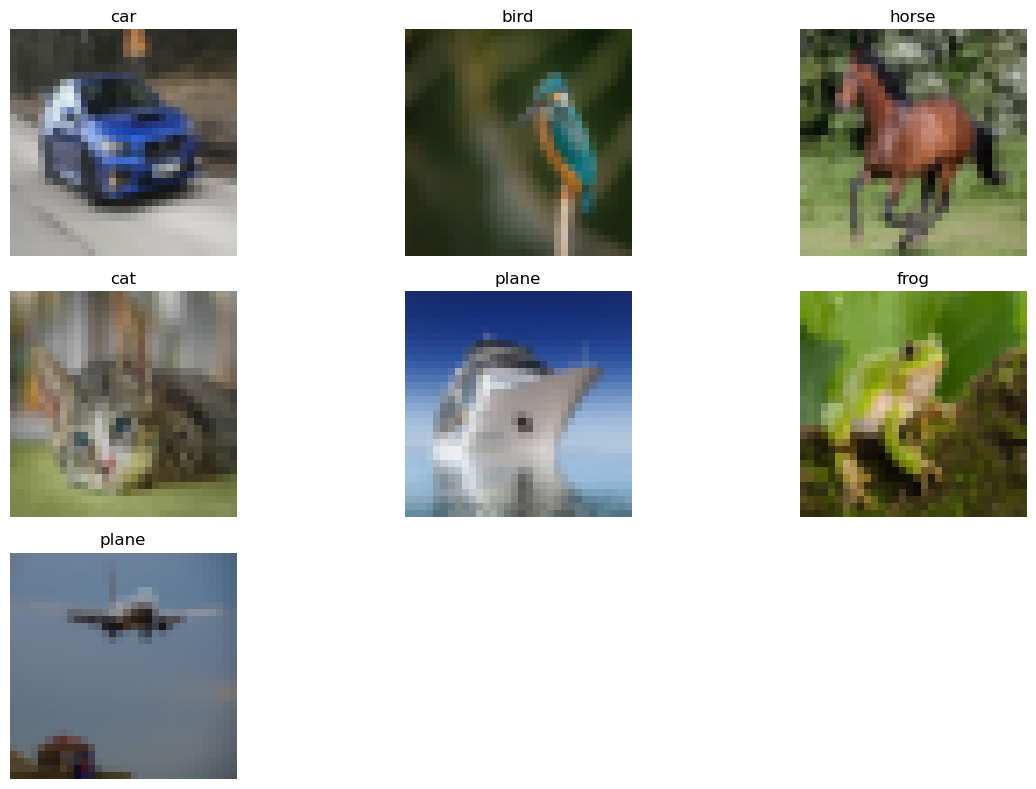

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Función para mostrar imágenes con sus respectivas etiquetas
def show_images_with_predictions(image_paths, model, class_names):
    # Cargar las imágenes
    images = [load_image(img) for img in image_paths]
    
    # Establecer el modelo en modo de evaluación
    model.eval()
    
    # Configurar la figura para mostrar las imágenes
    plt.figure(figsize=(12, 8))
    
    # Recorrer cada imagen y mostrarla con su predicción
    for i, image in enumerate(images):
        with torch.no_grad():
            output = model(image)
            _, predicted = torch.max(output, 1)
            label = class_names[predicted.item()]
        
        # Convertir el tensor de imagen de [-1, 1] a [0, 1] y luego a [0, 255]
        img_numpy = image.squeeze(0).permute(1, 2, 0).numpy()
        img_numpy = (img_numpy * 0.5 + 0.5) * 255  # Desnormalizar
        img_numpy = img_numpy.astype(np.uint8)

        # Mostrar la imagen
        plt.subplot(3, 3, i + 1)  # Ajusta el número de filas y columnas según el número de imágenes
        plt.imshow(img_numpy)
        plt.title(label)
        plt.axis('off')  # Quitar los ejes
    
    plt.tight_layout()
    plt.show()

# Llamar a la función con las rutas de las imágenes y el modelo
show_images_with_predictions(image_paths, net, class_names)


### Reconocimiento Óptico de Caracteres

In [26]:
!pip install easyocr opencv-contrib-python --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.4 MB/s eta 0:00:002.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 2.3 MB/s eta 0:00:003.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [34]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [58]:
#IMAGE_PATH = 'surf.jpeg'
IMAGE_PATH = 'sign.png'
#IMAGE_PATH = 'street1.jpg'
#IMAGE_PATH = 'street2.png'

In [59]:
# Crea una instancia de 'easyocr.Reader' especificando el idioma que se usará. En este caso, se indica 'en' para inglés.
reader = easyocr.Reader(['en'])

# Lee el texto de la imagen proporcionada en IMAGE_PATH. 
# 'readtext' devuelve una lista con los resultados detectados en la imagen.
result = reader.readtext(IMAGE_PATH)

# Muestra el resultado, que contiene el texto detectado, las coordenadas de las cajas delimitadoras y la confianza en la detección.
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683688296531474),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973806374694)]

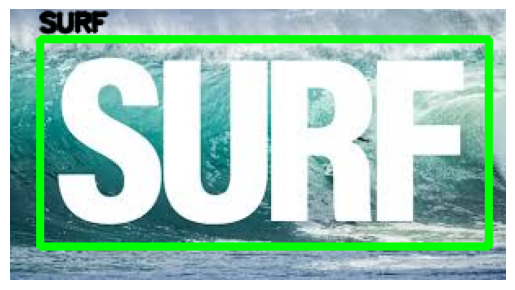

In [43]:
# Lee la imagen desde la ruta especificada.
img = cv2.imread(IMAGE_PATH)

# Dibuja un rectángulo y superpone el texto detectado en la imagen
for (bbox, text, prob) in result:
    top_left = tuple(map(int, bbox[0]))  # Coordenadas de la esquina superior izquierda
    bottom_right = tuple(map(int, bbox[2]))  # Coordenadas de la esquina inferior derecha

    # Dibuja un rectángulo verde alrededor del texto detectado
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

    # Superpone el texto detectado en la imagen
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 5), 
                      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)

# Convierte la imagen de BGR a RGB para mostrar correctamente en Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Muestra la imagen modificada con el rectángulo y el texto utilizando Matplotlib.
plt.imshow(img_rgb)
plt.axis('off')  # Quitar los ejes
plt.show()

In [55]:
# Define las coordenadas de la primera detección y el texto
top_left = tuple(result[0][0][0])  # Coordenada superior izquierda de la caja delimitadora
bottom_right = tuple(result[0][0][2])  # Coordenada inferior derecha de la caja delimitadora
text = result[0][1]  # Texto detectado
font = cv2.FONT_HERSHEY_SIMPLEX  # Fuente para el texto

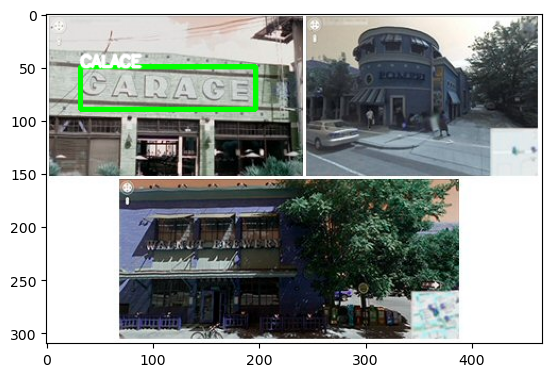

In [56]:
# Lee la imagen desde la ruta especificada.
img = cv2.imread(IMAGE_PATH)

# Dibuja un rectángulo verde alrededor del área delimitada por las coordenadas 'top_left' y 'bottom_right'.
# El color (0,255,0) es verde en BGR, y el grosor del rectángulo es de 3 píxeles.
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

# Superpone el texto detectado en la imagen, en la posición de 'top_left', usando la fuente y los parámetros definidos antes.
# El color (255,255,255) es blanco en BGR, el tamaño del texto es 0.5 y el grosor es 2 píxeles. cv2.LINE_AA suaviza los bordes del texto.
img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

# Muestra la imagen modificada con el rectángulo y el texto utilizando Matplotlib.
plt.imshow(img)
plt.show()


In [60]:
# Define las coordenadas de la primera detección y el texto
top_left = tuple(result[0][0][0])  # Coordenada superior izquierda de la caja delimitadora
bottom_right = tuple(result[0][0][2])  # Coordenada inferior derecha de la caja delimitadora
text = result[0][1]  # Texto detectado
font = cv2.FONT_HERSHEY_SIMPLEX  # Fuente para el texto

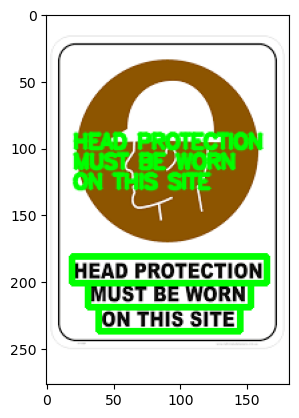

In [61]:
# Lee la imagen con multiples lineas desde la ruta especificada.
img = cv2.imread(IMAGE_PATH)

# Define un espaciador vertical inicial para posicionar el texto en la imagen.
spacer = 100

# Itera sobre cada detección de texto en el resultado devuelto por el OCR.
for detection in result: 
    # Obtiene las coordenadas de las esquinas superior izquierda y inferior derecha del área del texto detectado.
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    
    # Obtiene el texto reconocido en esa área.
    text = detection[1]
    
    # Dibuja un rectángulo verde alrededor del área delimitada por 'top_left' y 'bottom_right'.
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
    
    # Superpone el texto reconocido en una posición fija en la imagen, con un desplazamiento vertical que aumenta con cada iteración.
    img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Incrementa el espaciador para el siguiente texto, de modo que no se superpongan.
    spacer += 15

# Muestra la imagen modificada con los rectángulos y el texto usando Matplotlib.
plt.imshow(img)
plt.show()
